# Bankruptcy prediction
## Introduction
The dataset here presented shows several financial ratios of Taiwanese firm between 1999 and 2009 (here the dataset source from [kaggle](https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction)) , as feature for our model. The bankruptcy follow the definition from the Taiwan Stock Exchange. <br>
We will first do some PCA to identify a limited number of feature for our model, the label we try to predict is the first column "Bankrupt?".
## Data exploration and PCA



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.dropna(axis=0,inplace=True)
display(df)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


0    6599
1     220
Name: Bankrupt?, dtype: int64


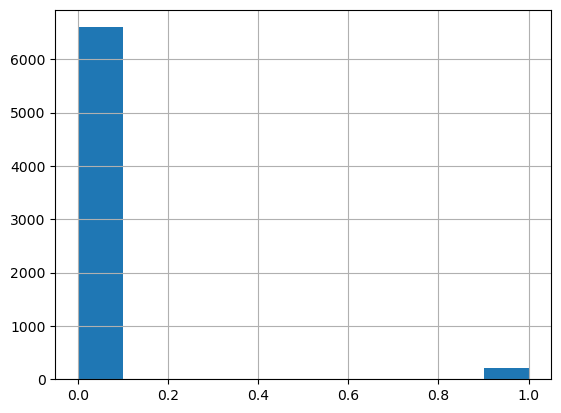

In [3]:
print(df[df.columns[0]].value_counts())
df[df.columns[0]].hist()
plt.show()

The data available are largely skewd to not bankrupt account we will handle this problem when building the pipeline. Considering all the 96 feature we have a gran total of 4560 correlation plot. We will first exclude the highly correlated feature and then show the correlation plot.

In [4]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


After the exploratory analysis we focus on the correlation of the features. We do not need redundant variables so we will drop the columns with correlation higher than 0.8 or smaller than -0.8. We will also drop the column "Net Income Flag" since it is a constant with value 1.

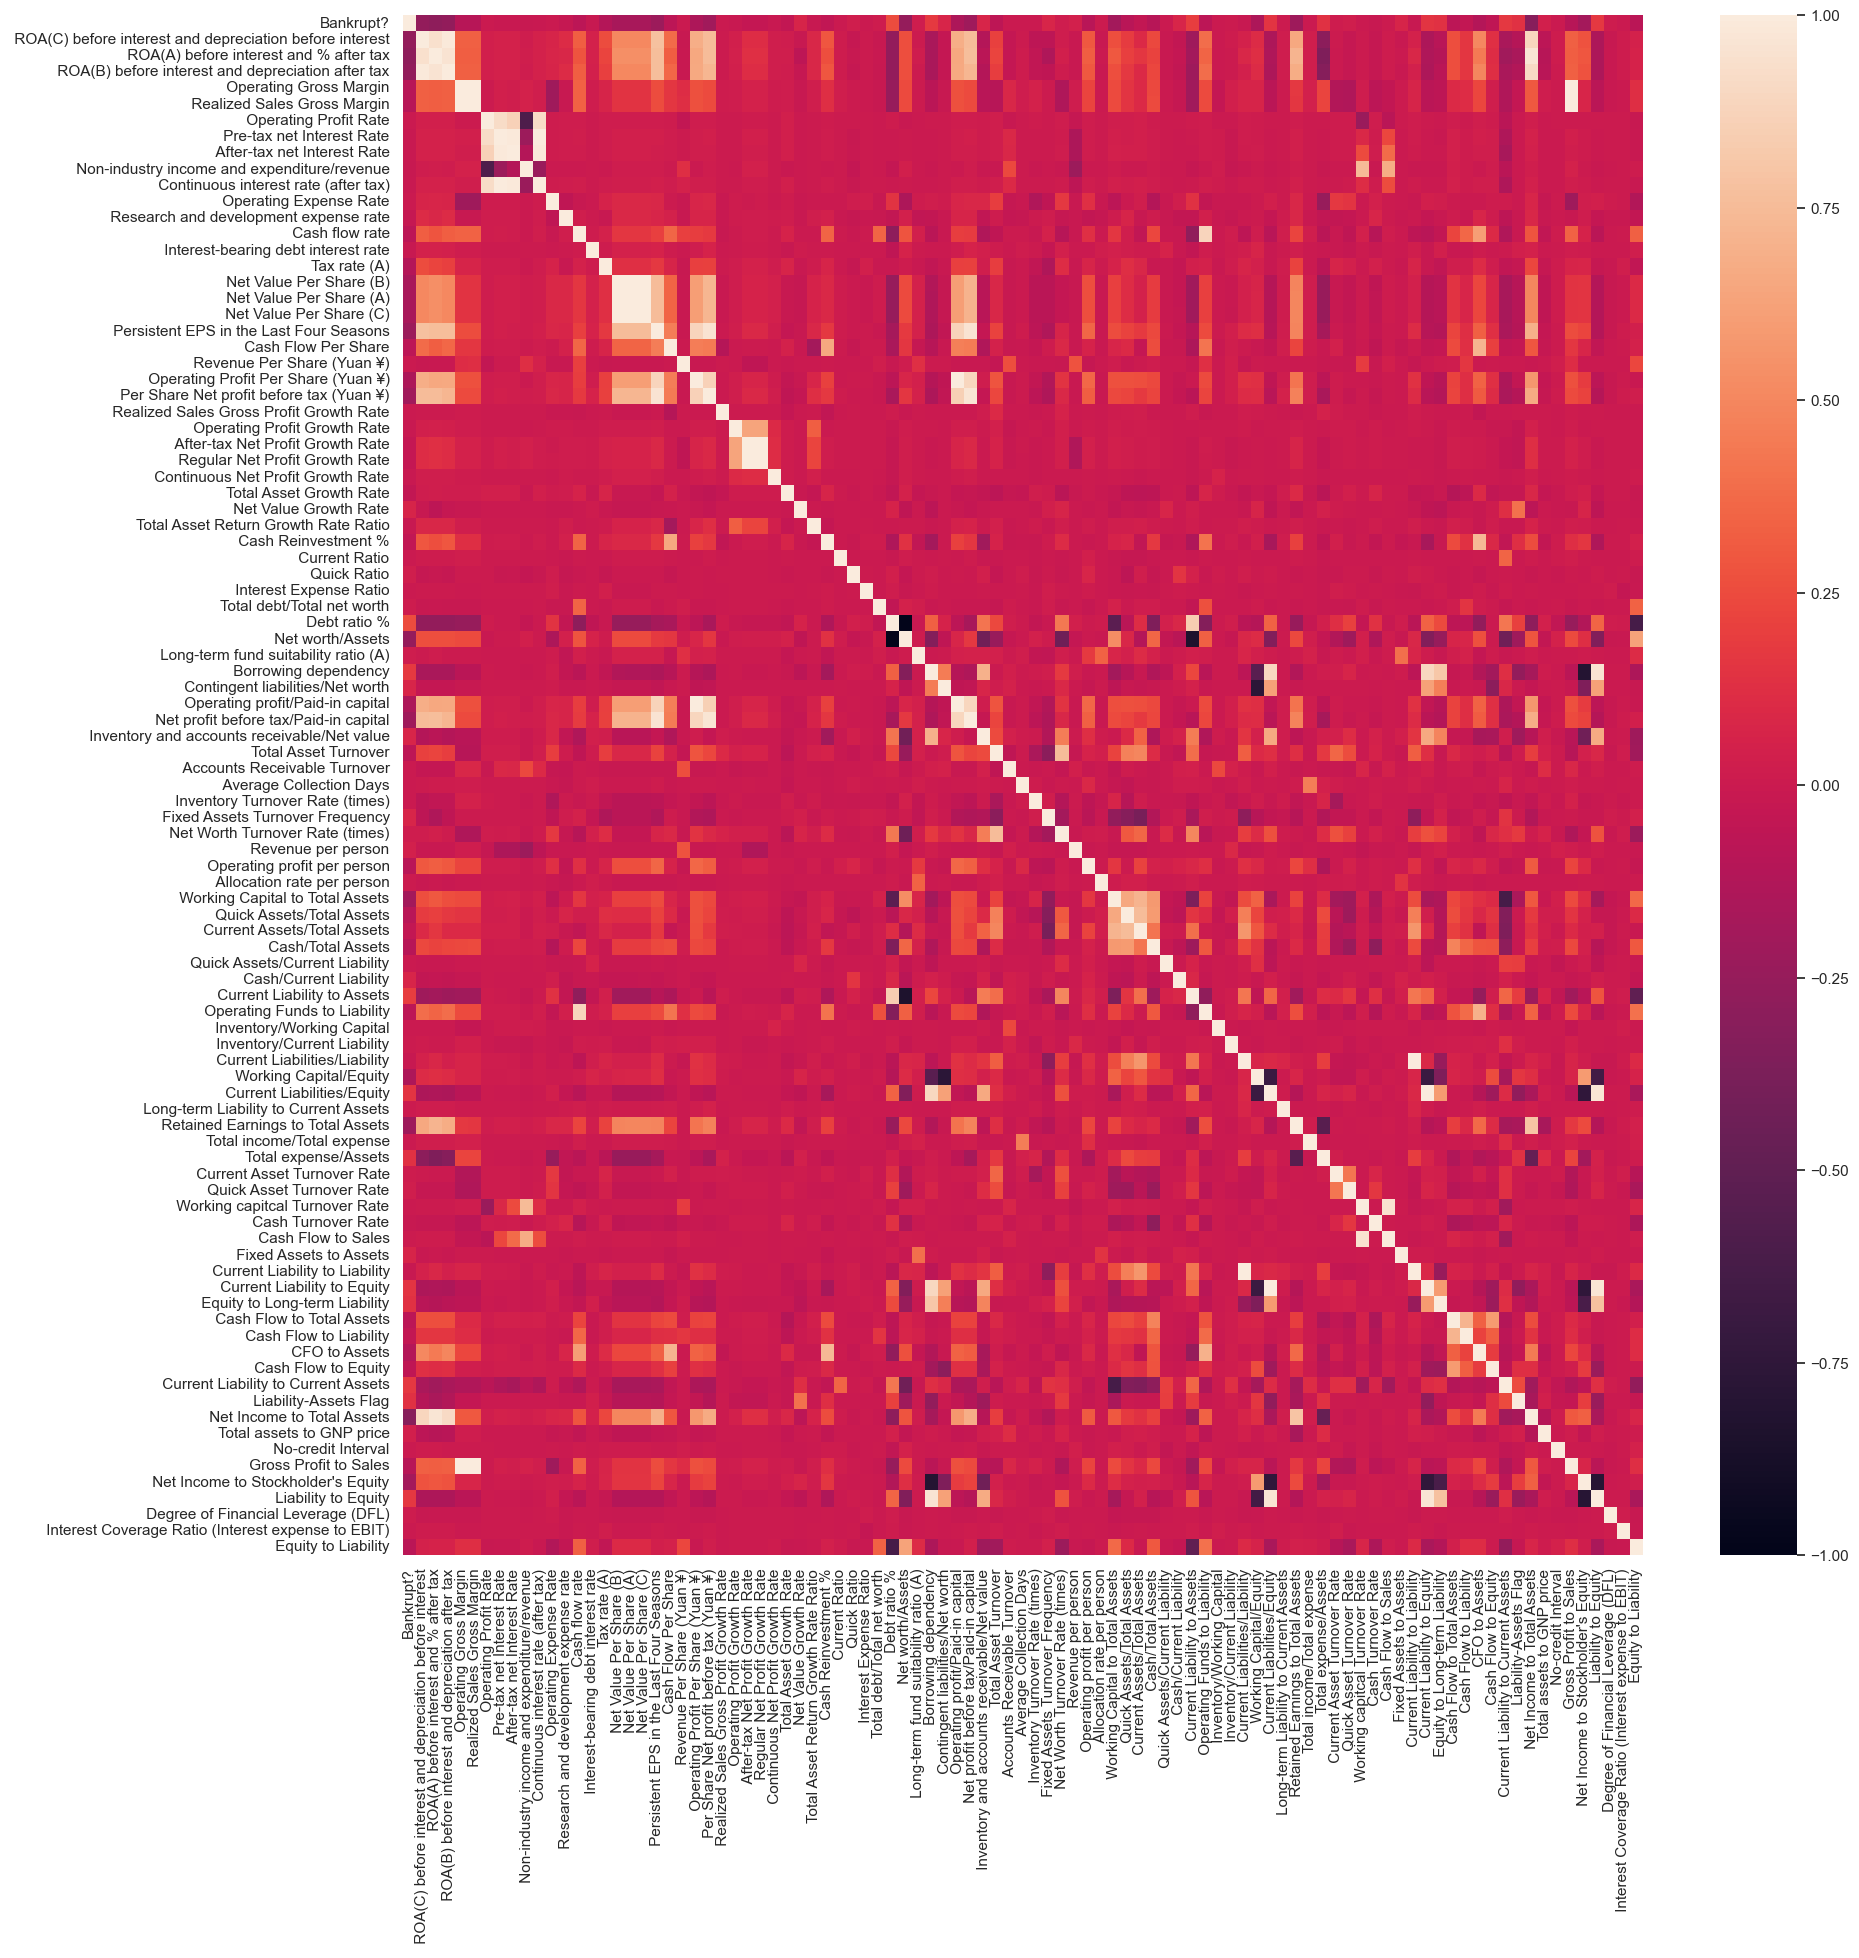

In [5]:
df = df.drop(df.columns[-2],axis=1)

def cor_heatmap(df):
  corr = df.corr()
  sns.set(rc={'figure.figsize':(20,20)})
  sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

cor_heatmap(df)

[' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Realized Sales Gross Margin', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Continuous interest rate (after tax)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Regular Net Profit Growth Rate', ' Net worth/Assets', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Current Liability to Assets', ' Operating Funds to Liability', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Net Income to Total Assets', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity']


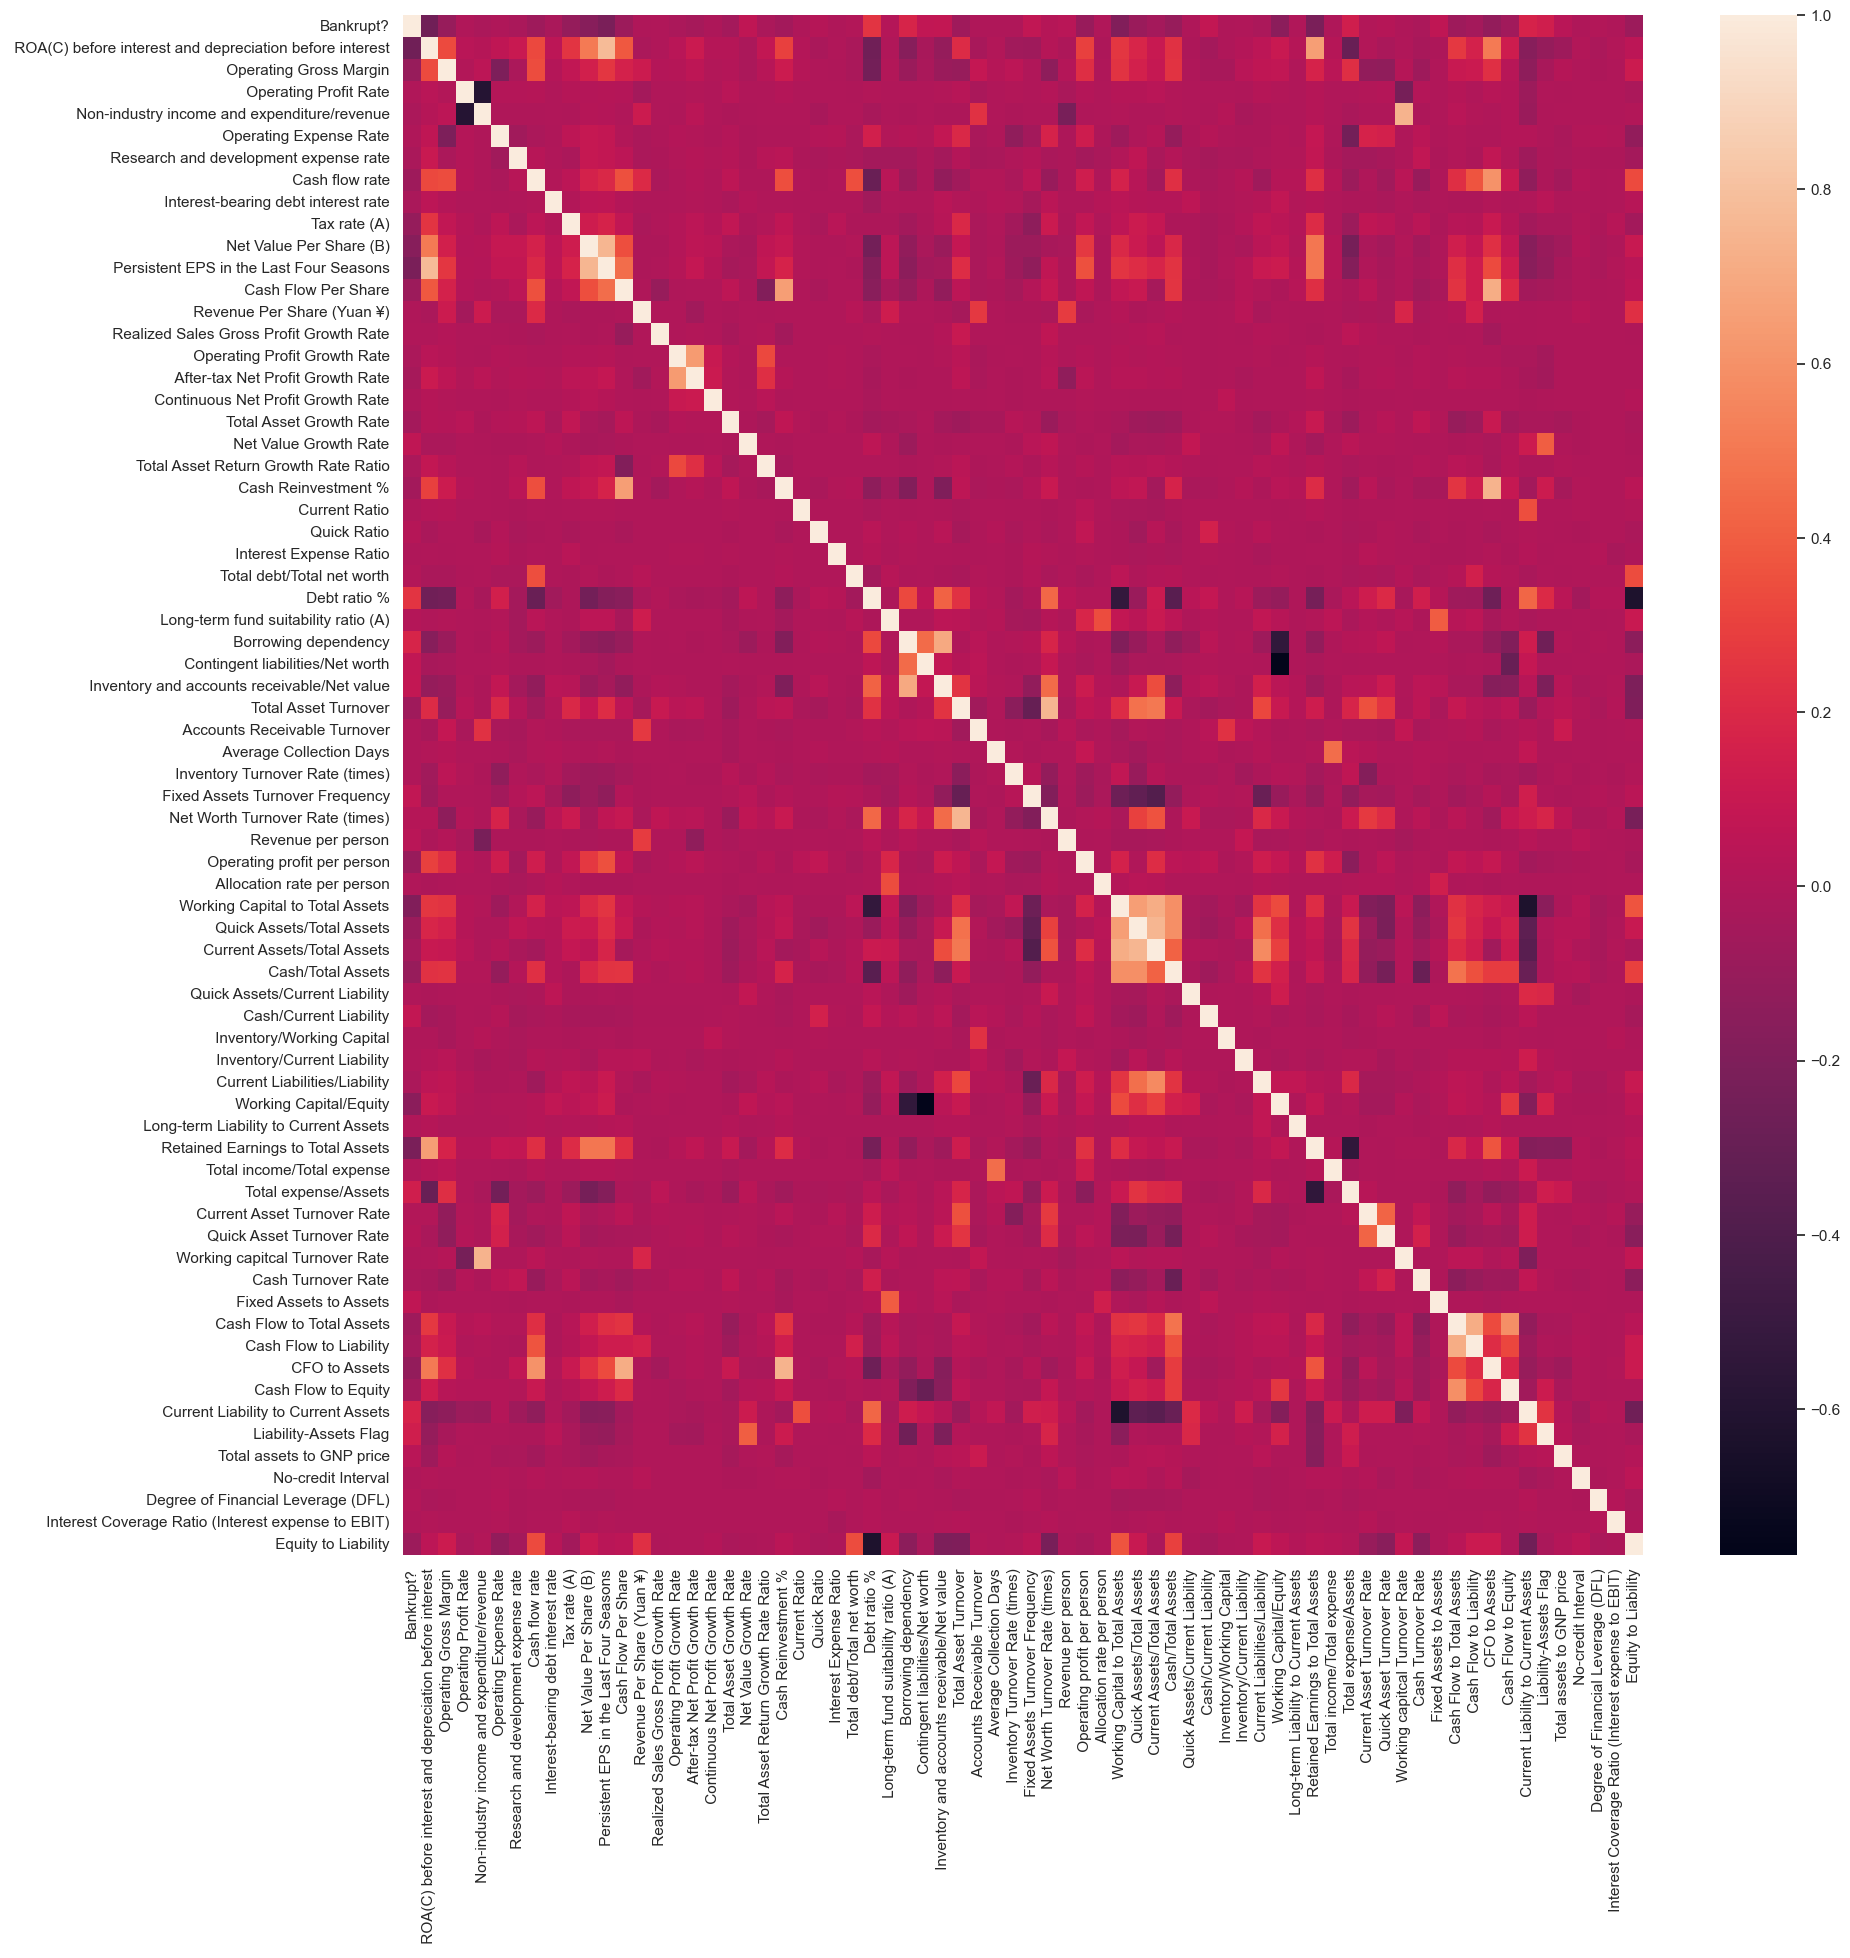

In [6]:
def drop_corr(x=0.8):
  upper_tri =corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column].abs() > x)]
  print(to_drop)
  new_df = df.drop(to_drop,axis=1)
  return new_df
  
corr = df.corr()
n_df = drop_corr(.8)
cor_heatmap(n_df)


In [7]:
display(n_df)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,...,0.458609,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,...,0.459001,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,2.550000e+07,0.458521,7.900790e-04,0.000000,...,0.459254,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.000000e+00,0.465705,4.490449e-04,0.000000,...,0.448518,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.000000e+00,0.462746,6.860686e-04,0.000000,...,0.454411,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.604455,0.998992,0.303510,1.510213e-04,4.500000e+09,0.463734,1.790179e-04,0.113372,...,0.458639,0.587178,0.314063,0.027951,0,0.000466,0.623620,0.027064,0.566193,0.029890
6815,0,0.475162,0.598308,0.998992,0.303520,5.220000e+09,1.440000e+09,0.461978,2.370237e-04,0.371596,...,0.459058,0.569498,0.314446,0.031470,0,0.001959,0.623931,0.027009,0.566018,0.038284
6816,0,0.472725,0.610444,0.998984,0.303512,2.509312e-04,1.039086e-04,0.472189,0.000000e+00,0.490839,...,0.452465,0.589341,0.313353,0.007542,0,0.002840,0.624156,0.026791,0.565158,0.097649
6817,0,0.506264,0.607850,0.999074,0.303498,1.236154e-04,2.510000e+09,0.476123,2.110211e-04,0.181294,...,0.471313,0.678338,0.320118,0.022916,0,0.002837,0.623957,0.026822,0.565302,0.044009


We have dropped 26 columns, now we can proceed with feature projection using PCA mehtod of scikit learn library. In order to explore the most important feature we are gonna plot the correlation between the label to predict and the other columns

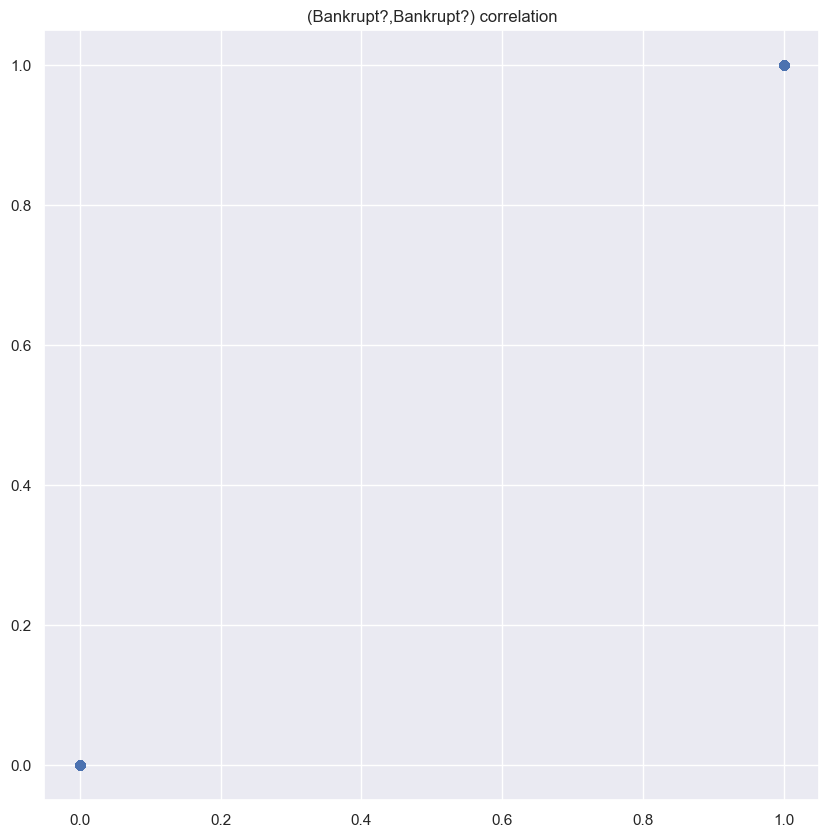

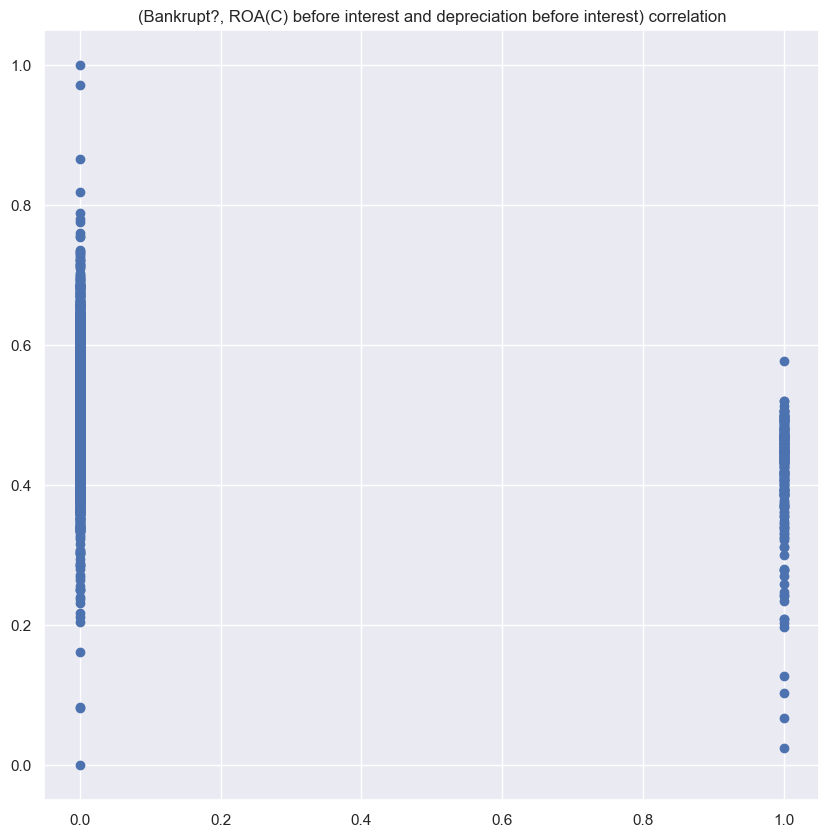

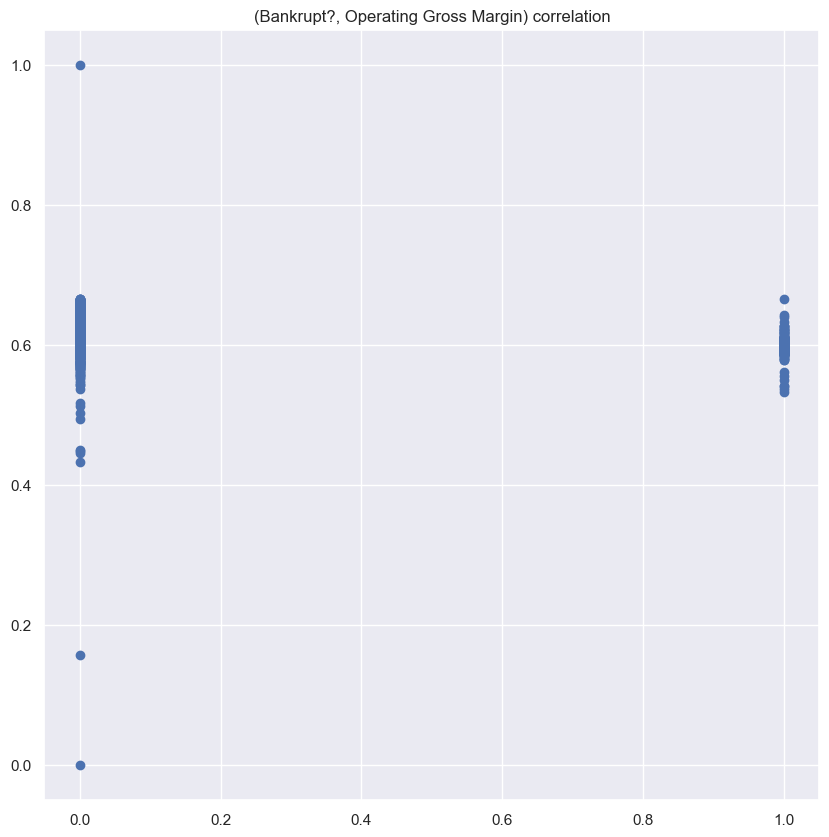

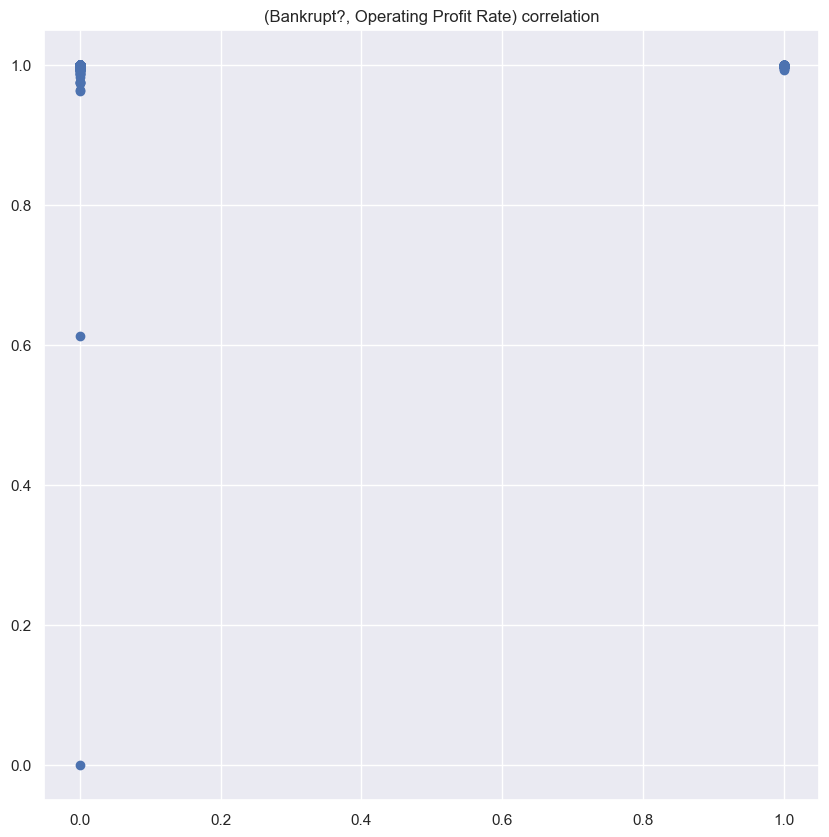

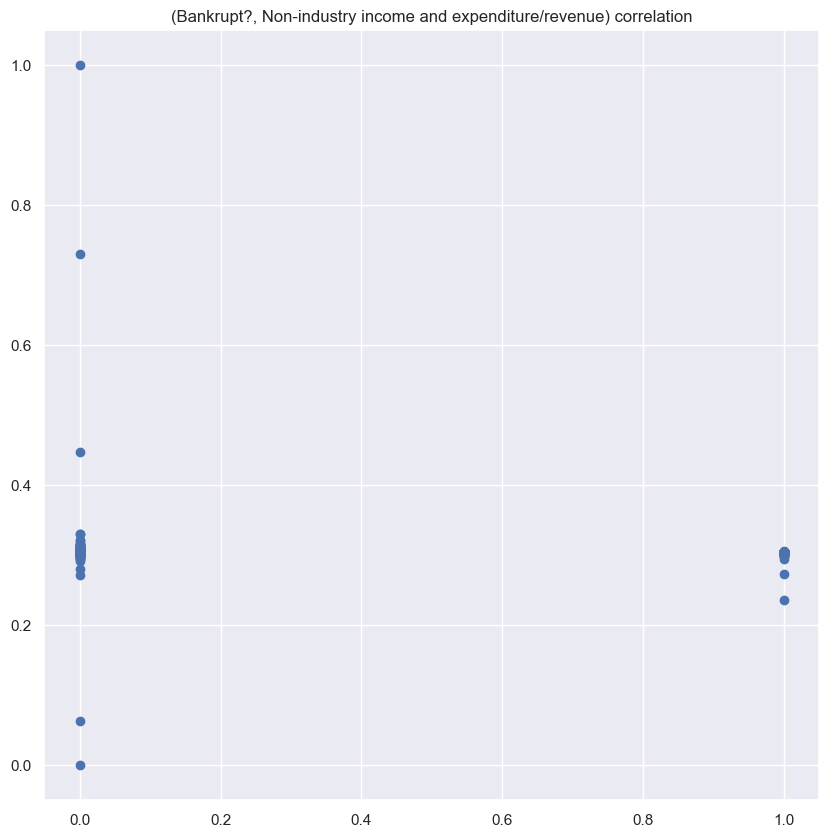

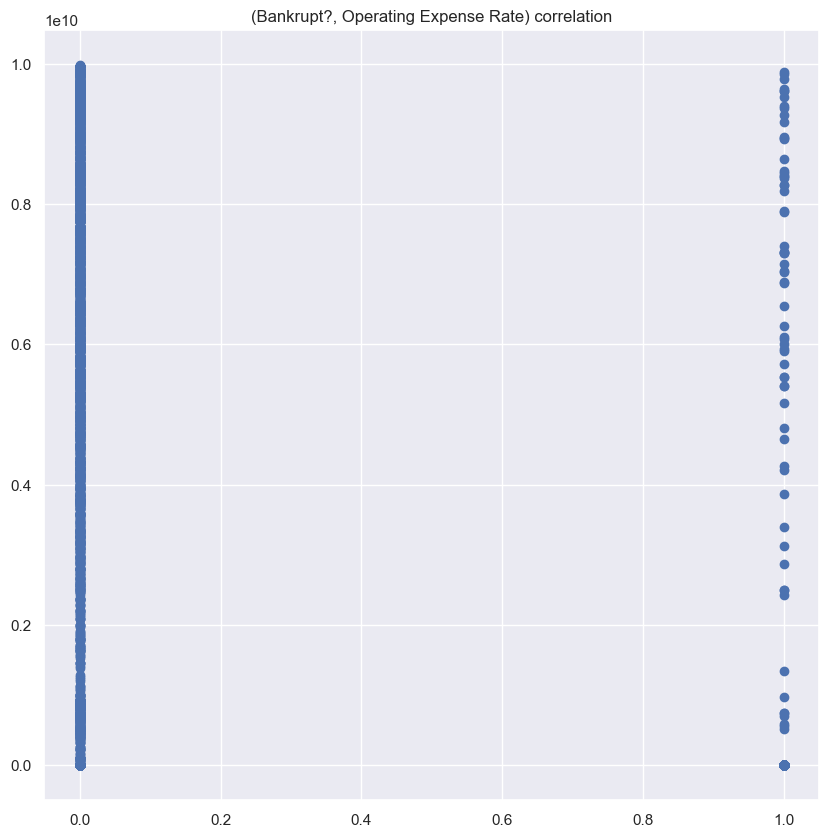

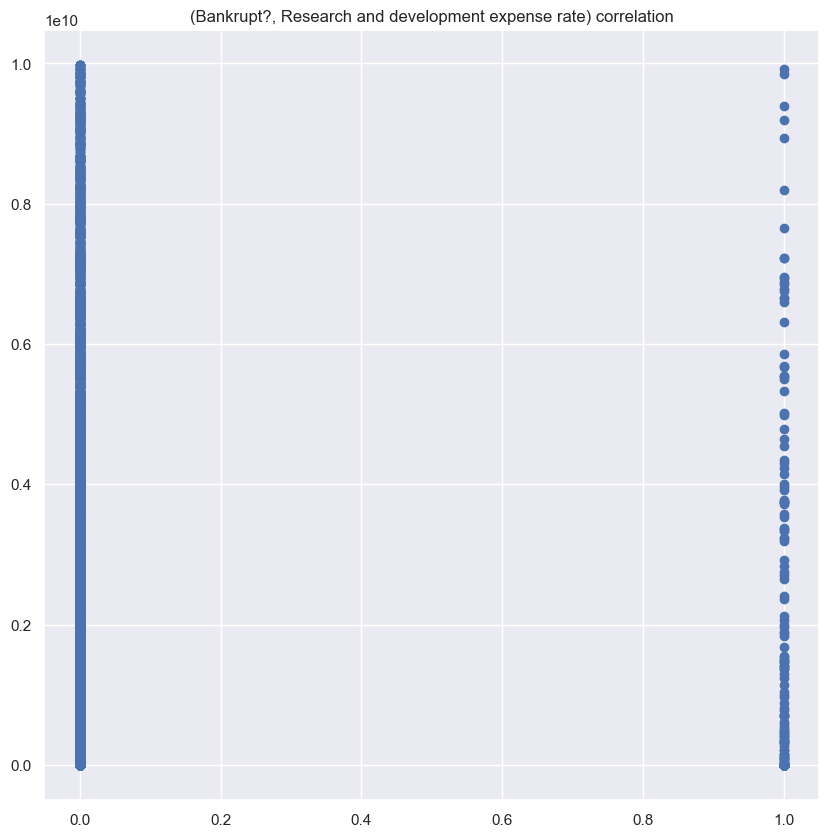

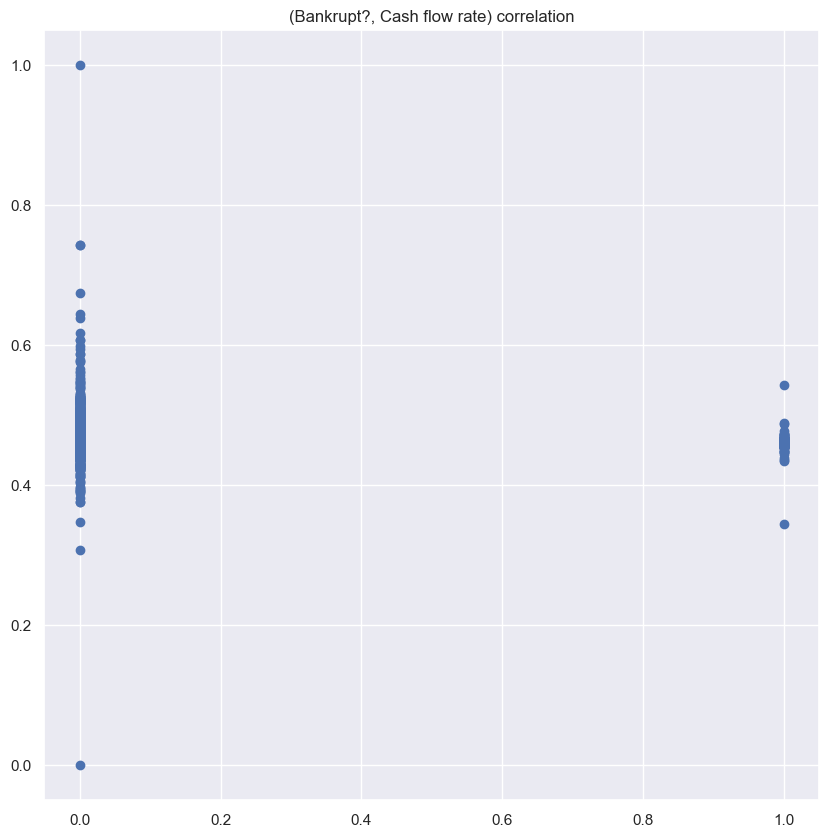

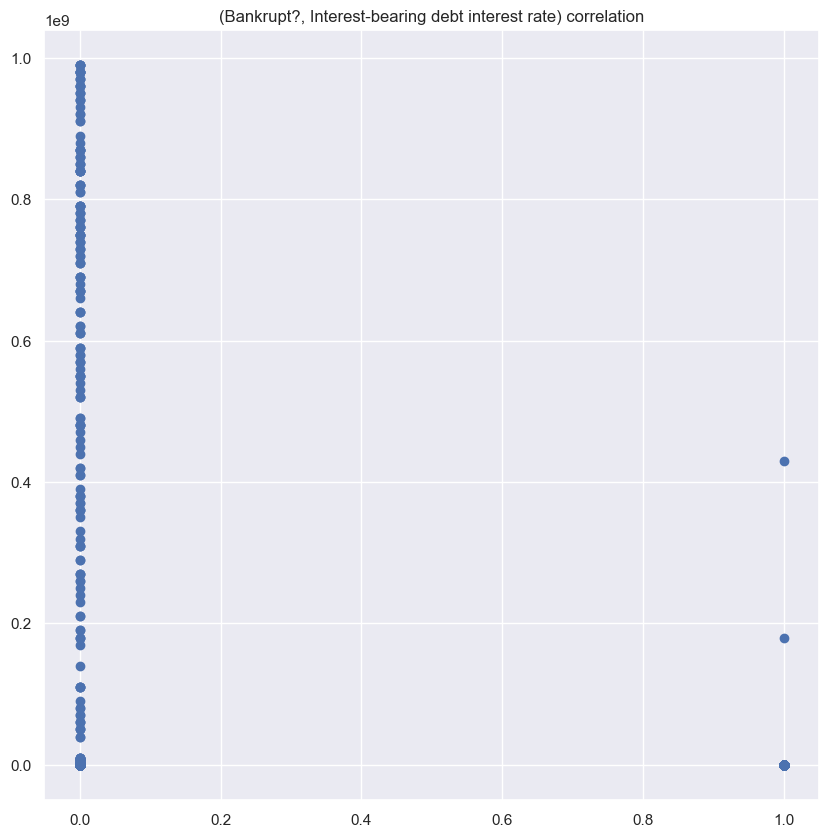

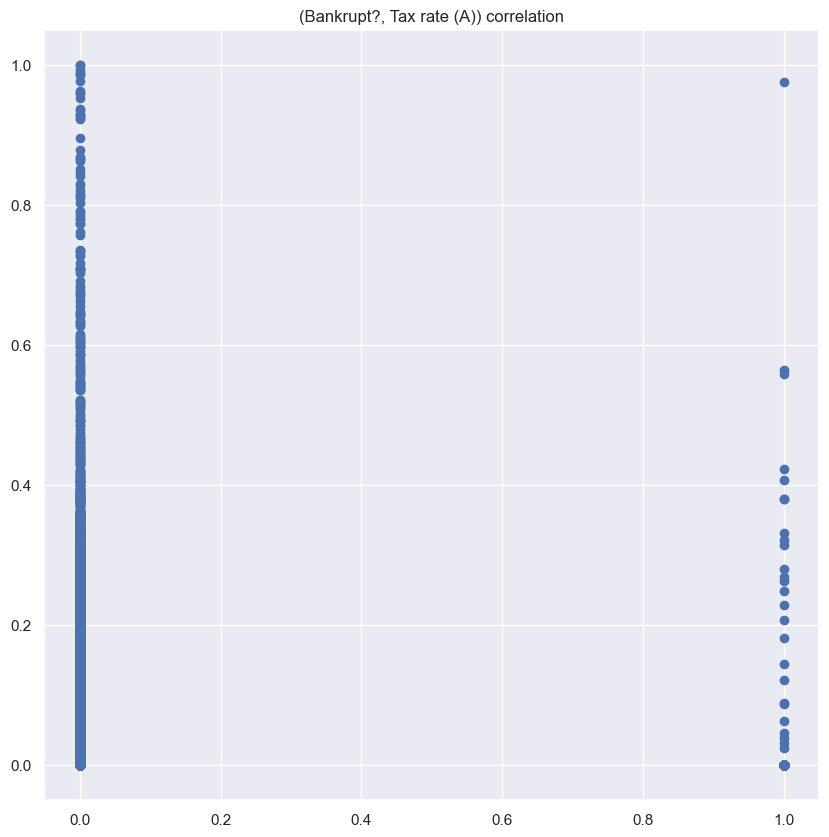

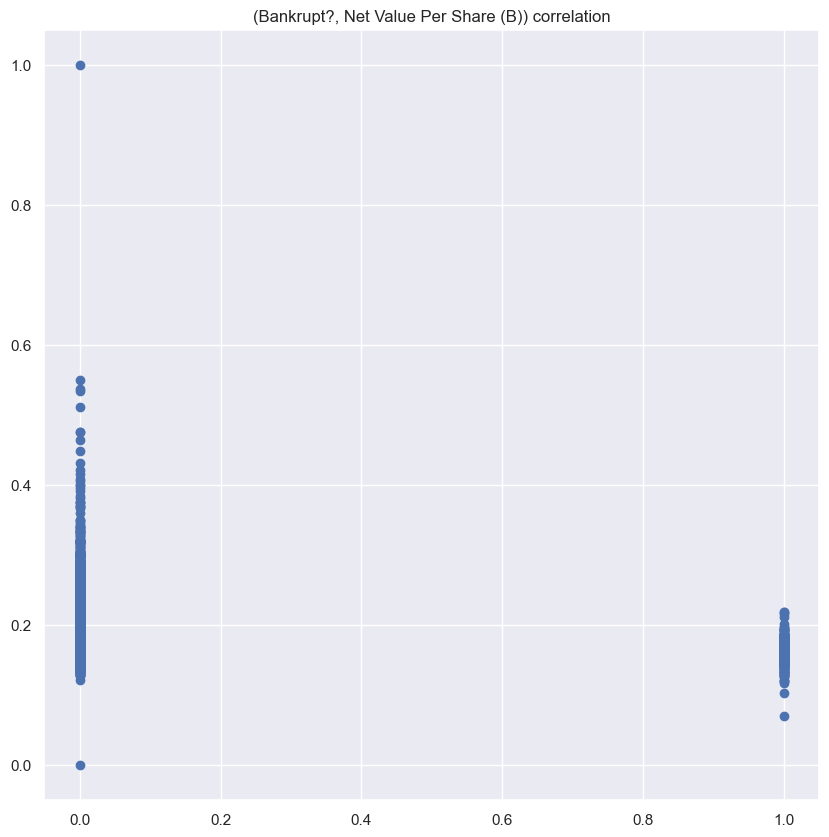

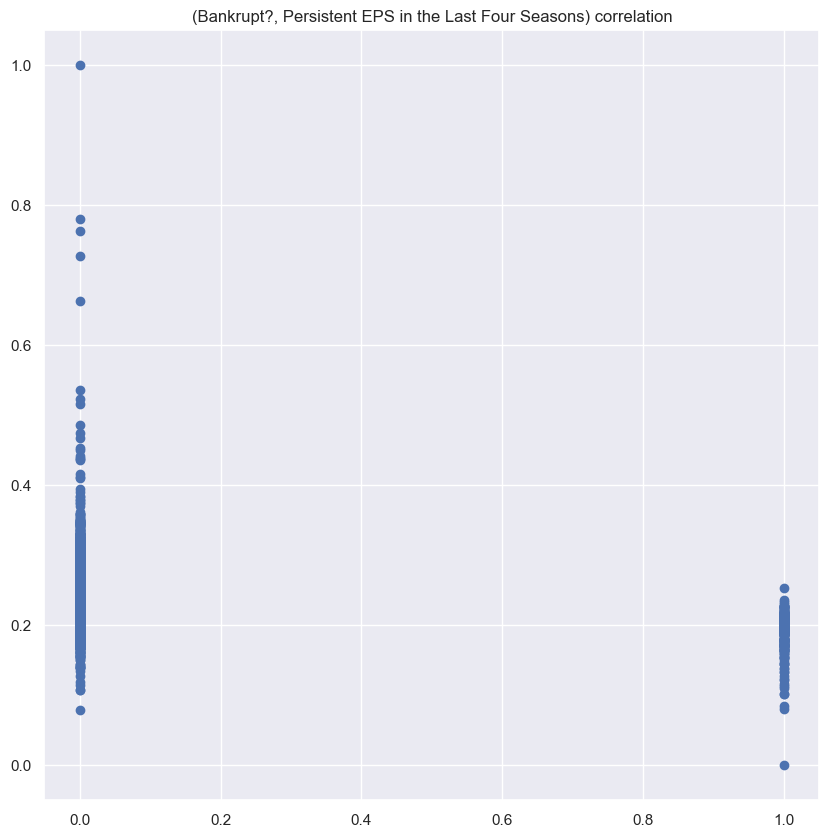

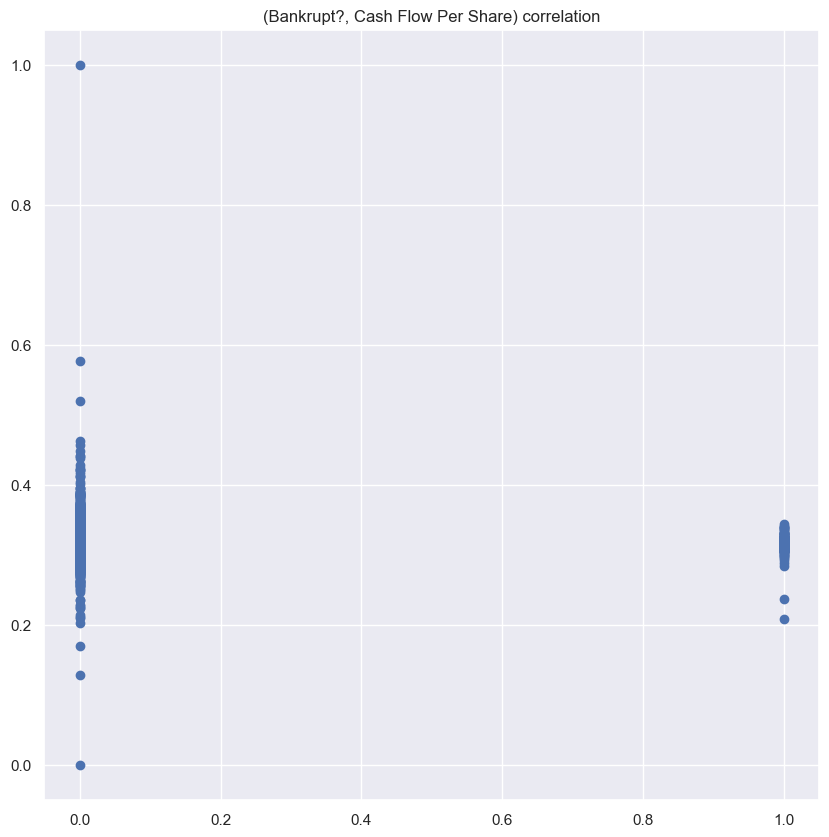

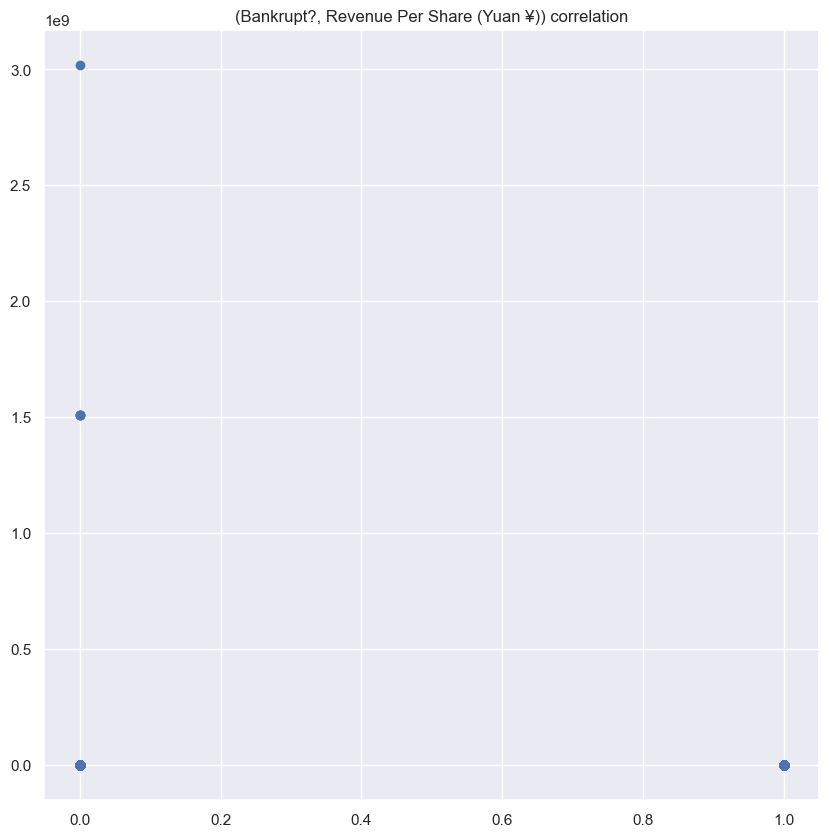

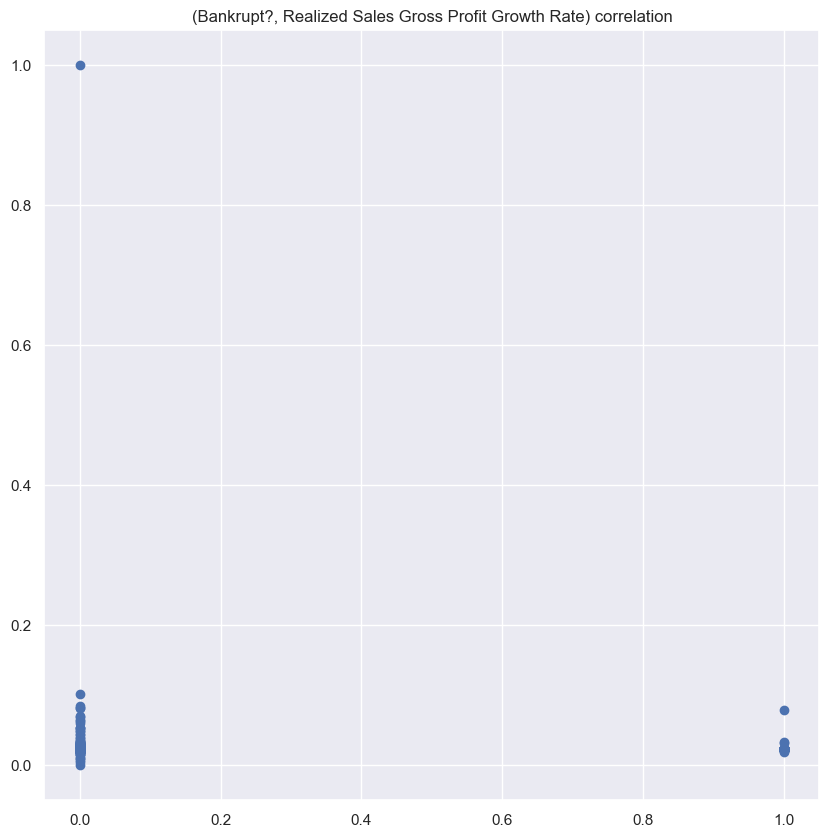

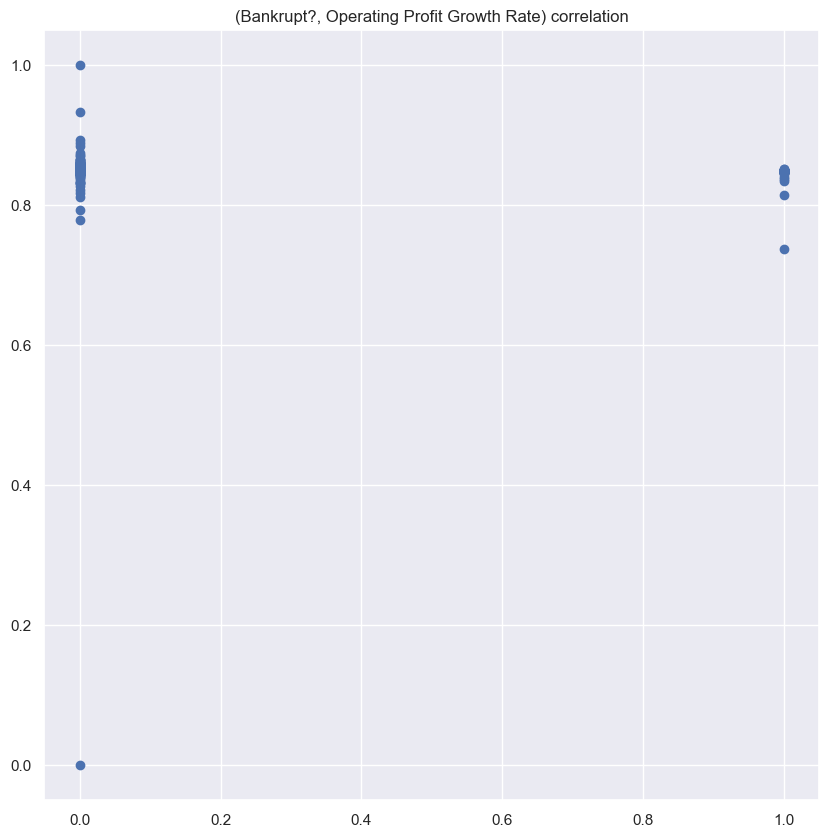

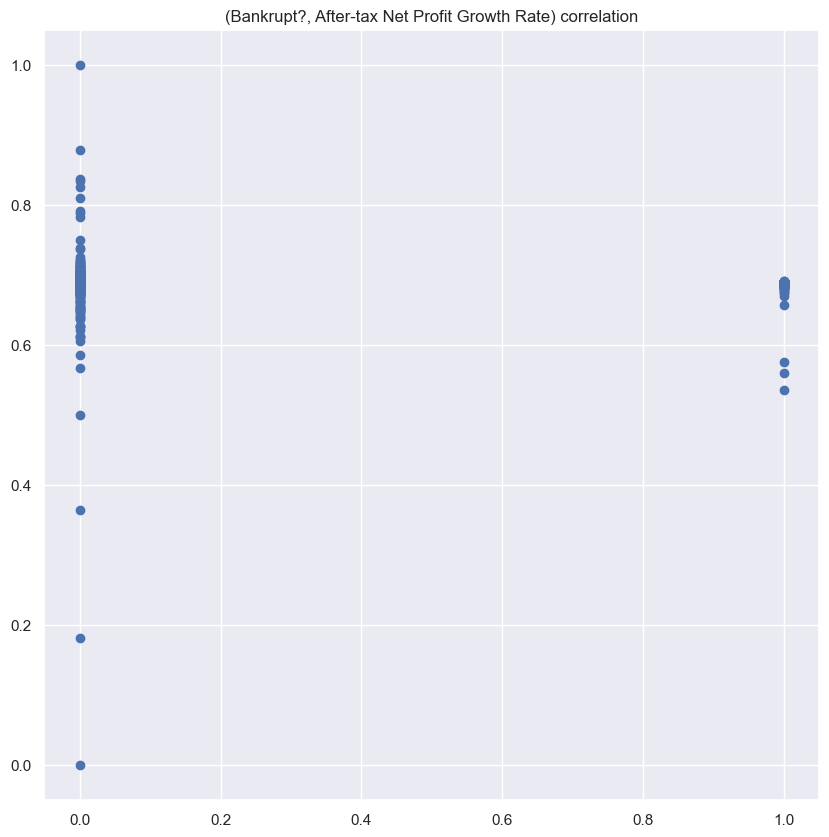

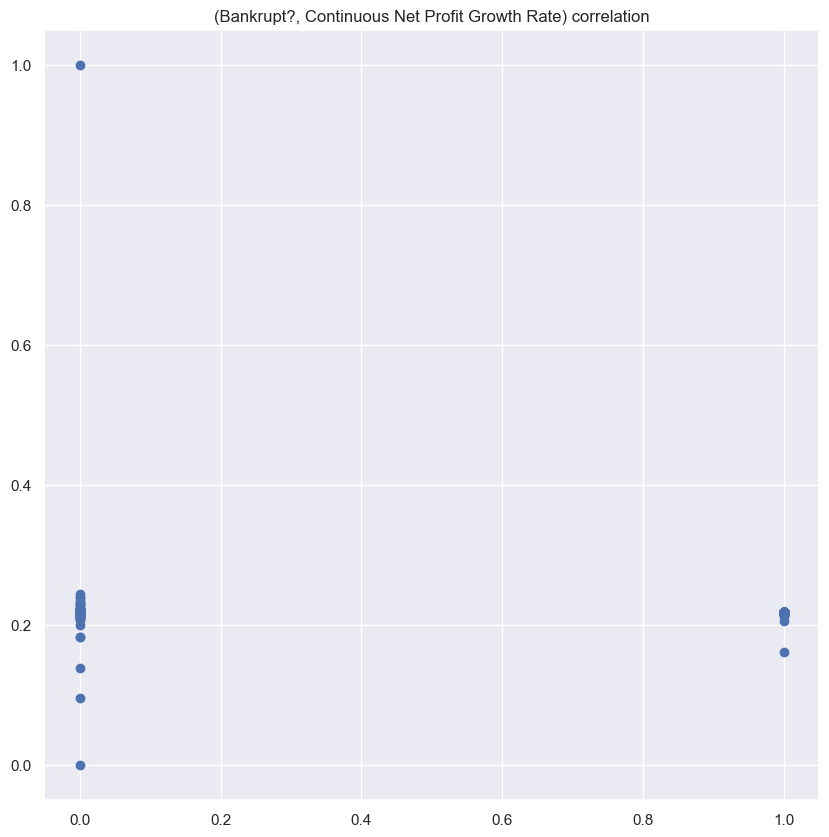

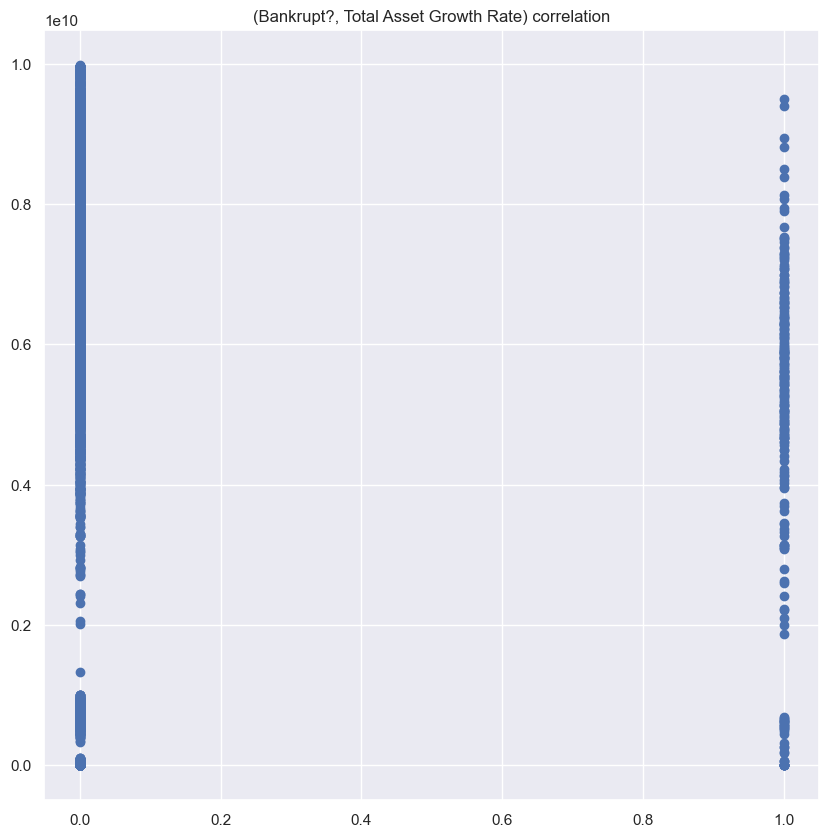

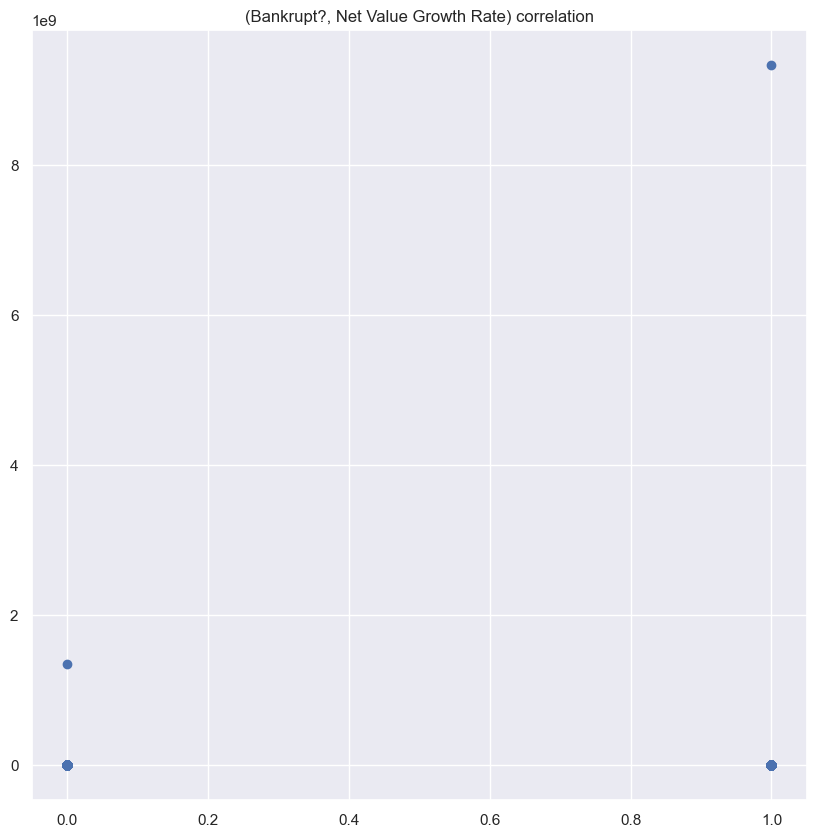

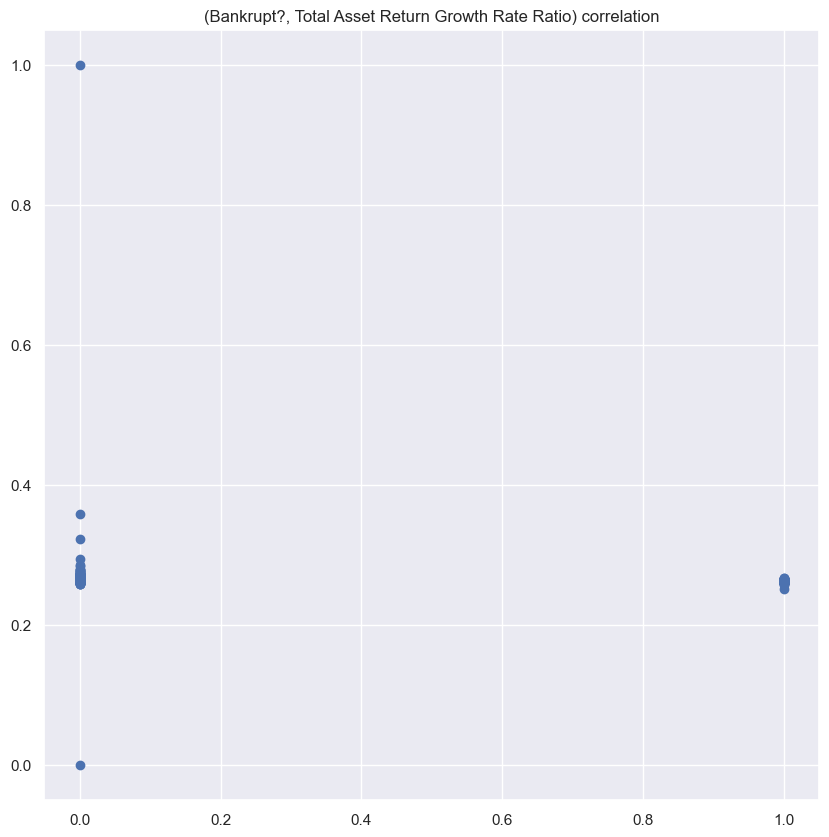

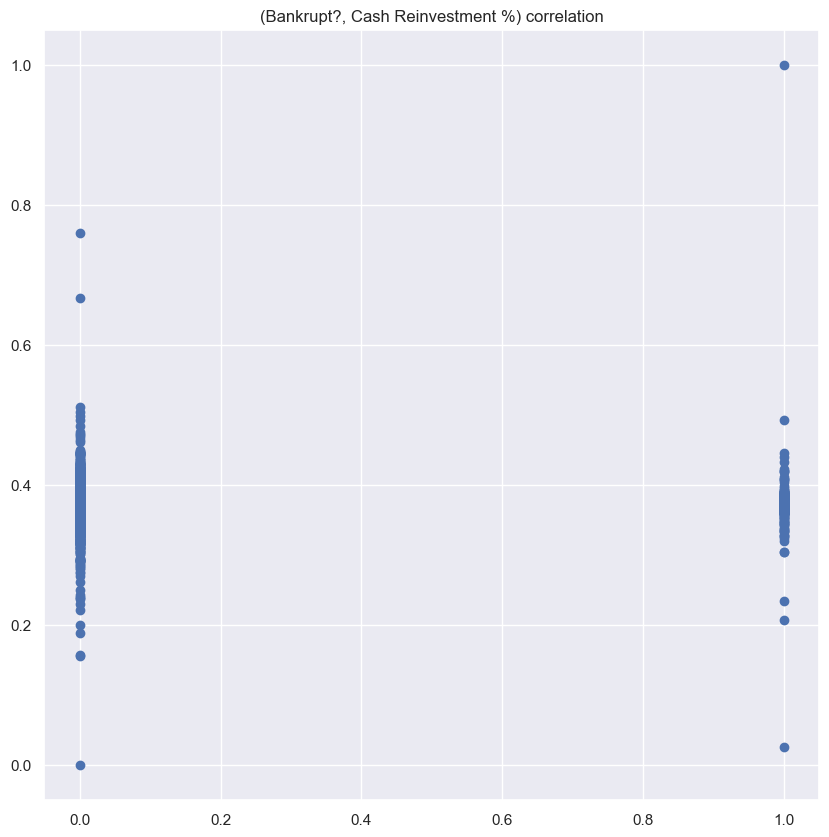

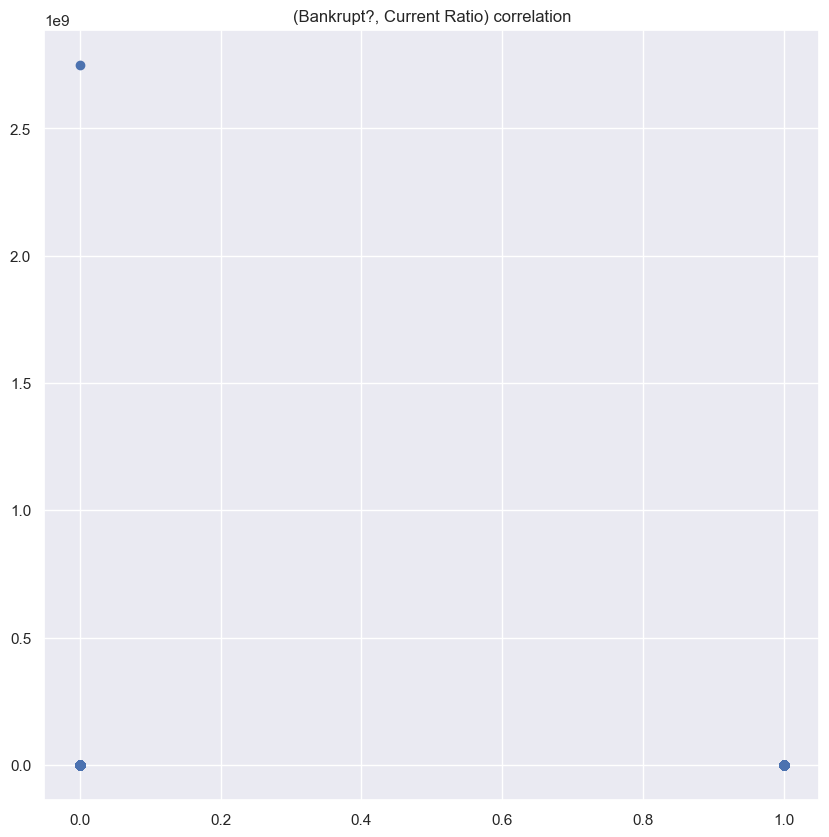

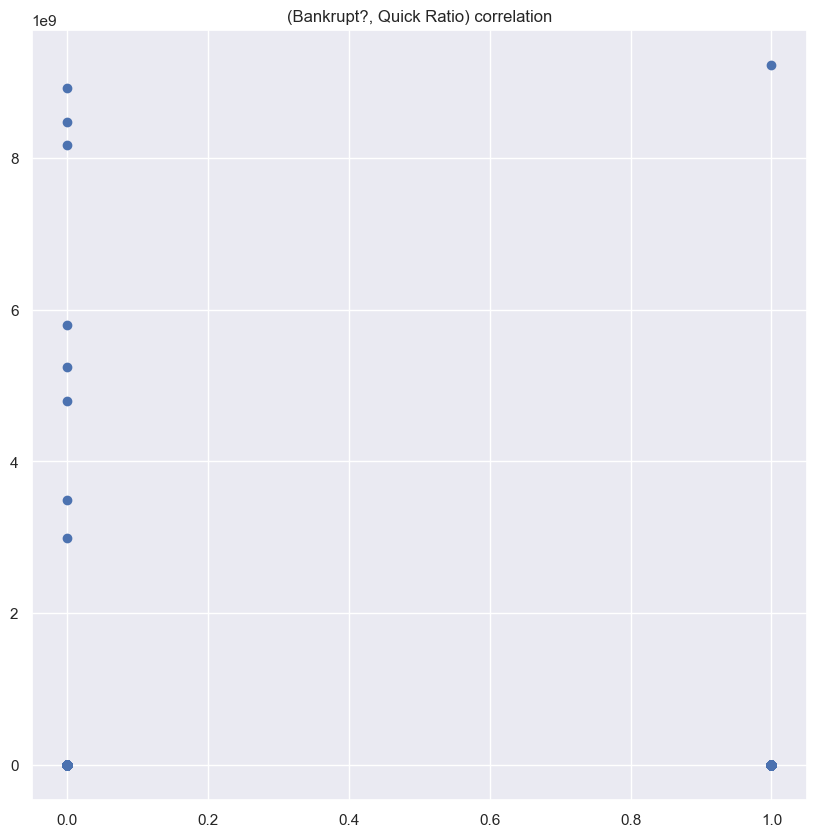

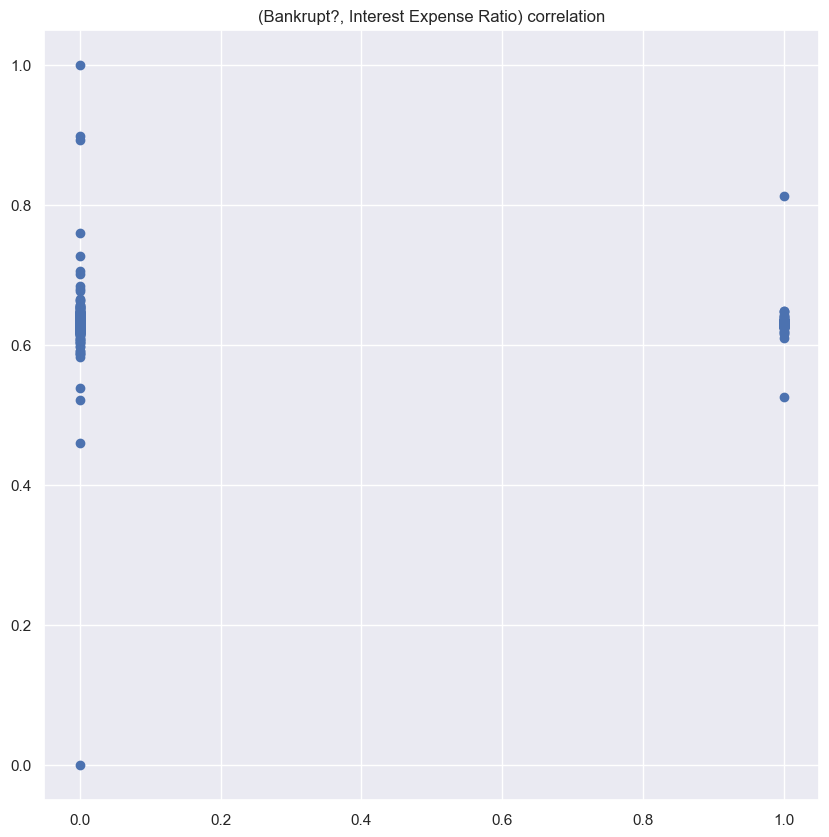

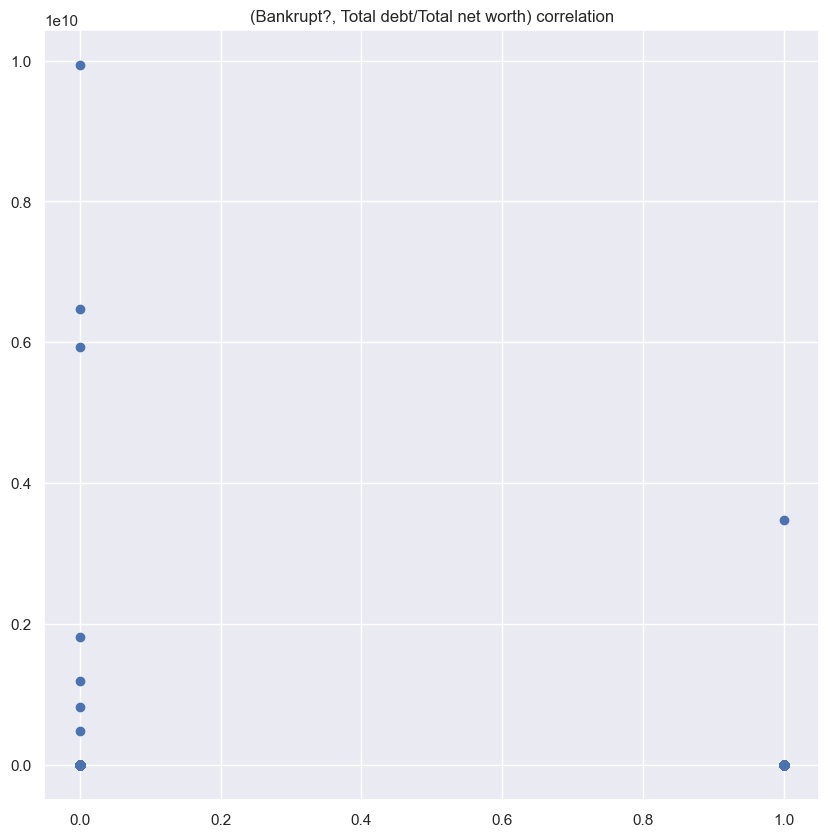

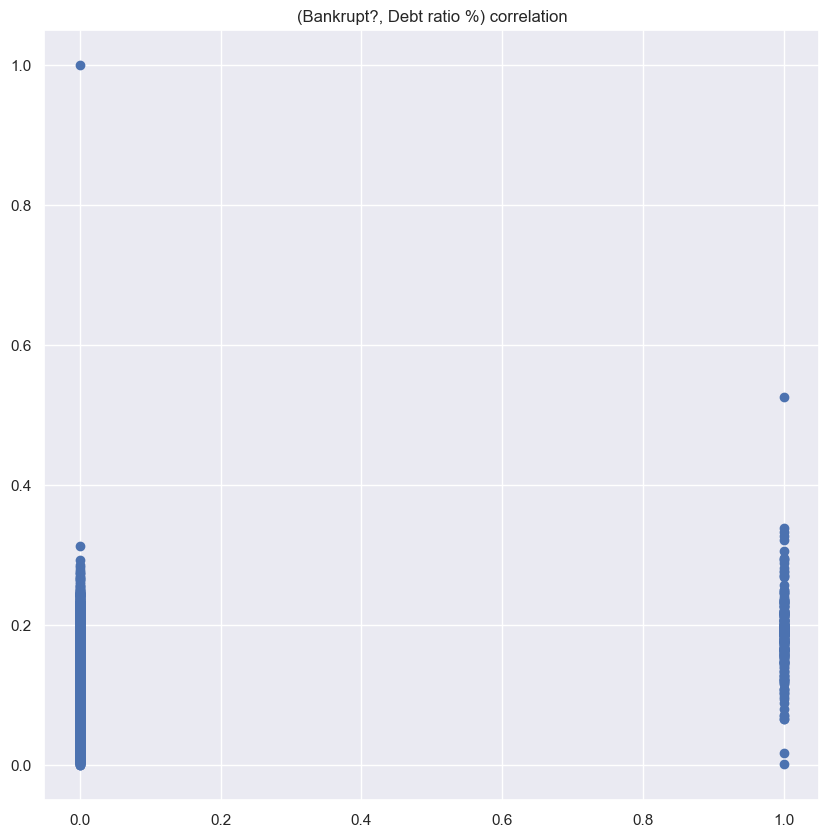

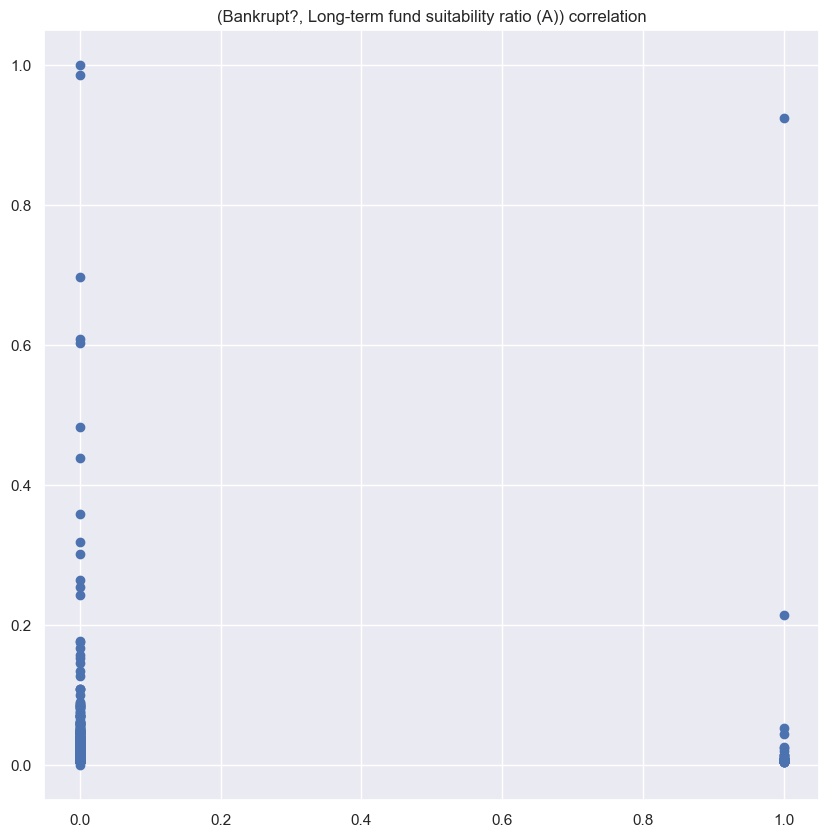

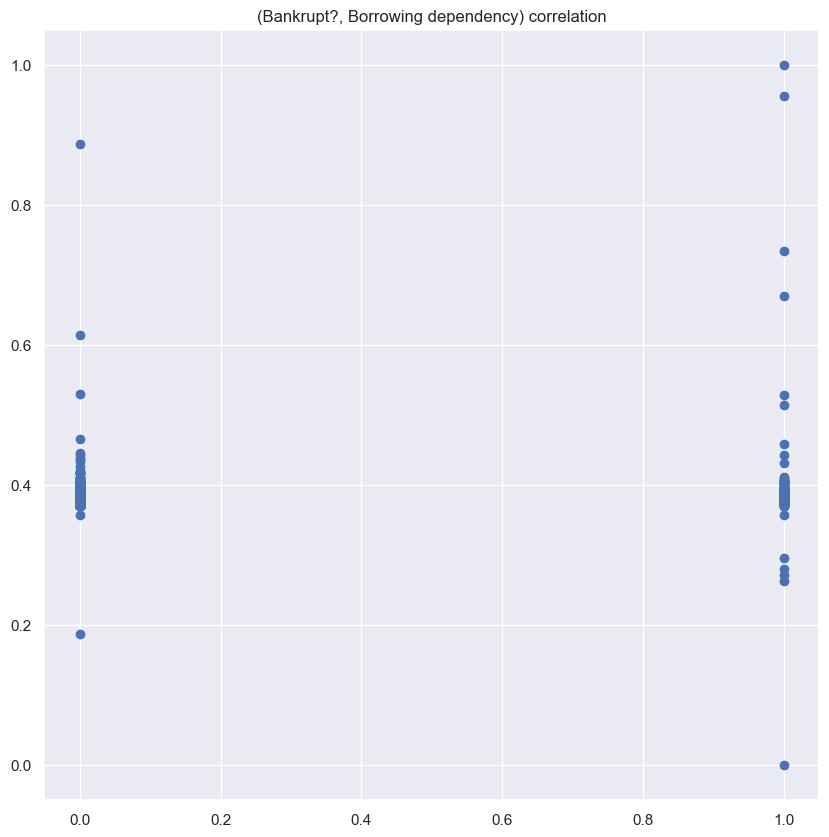

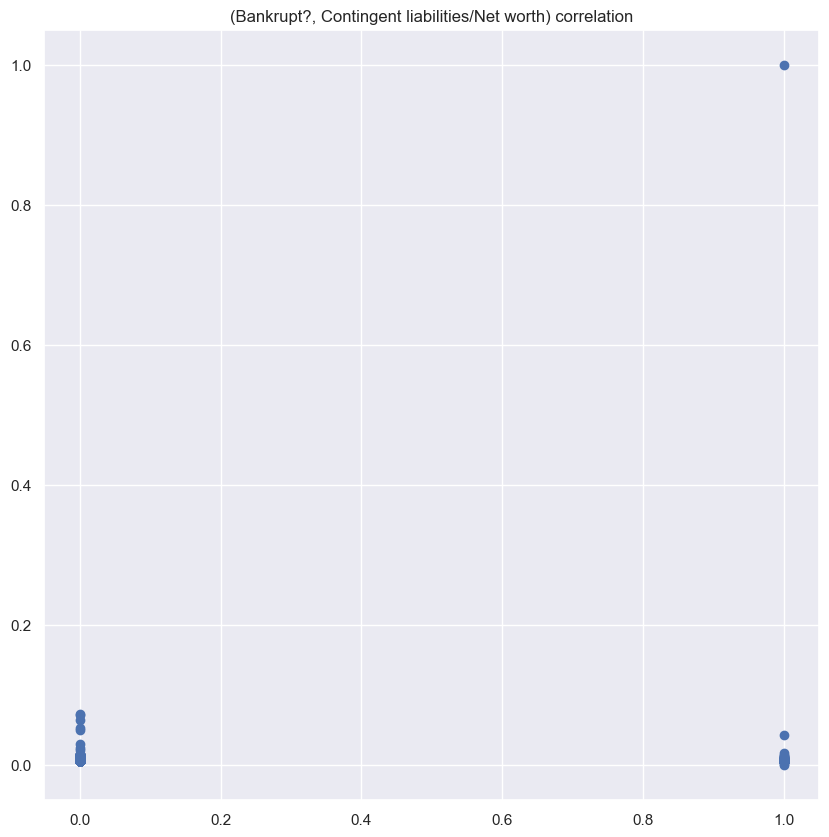

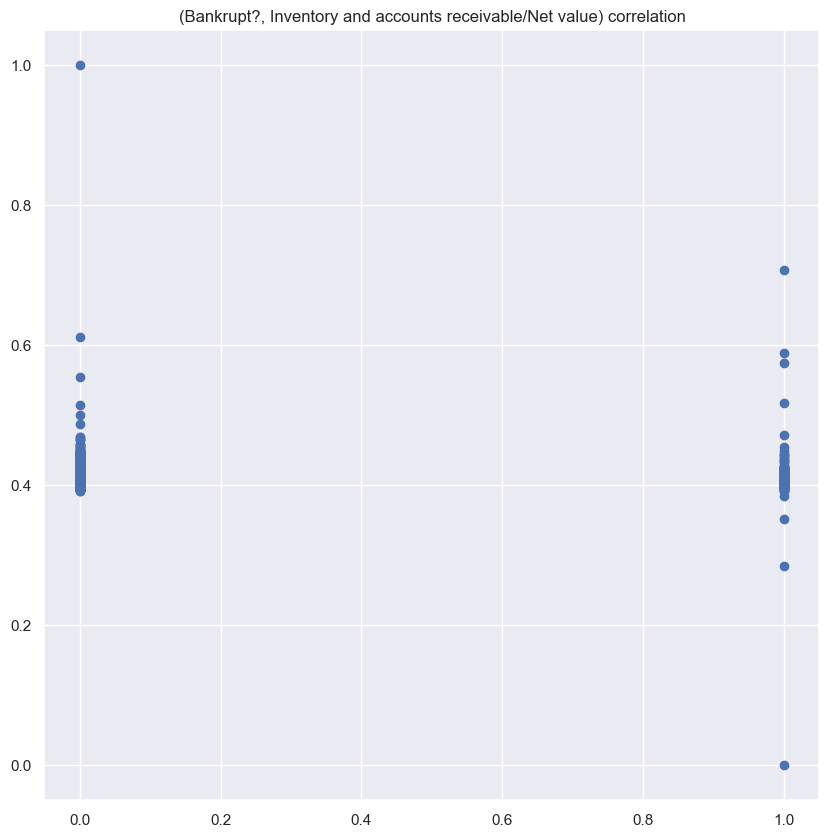

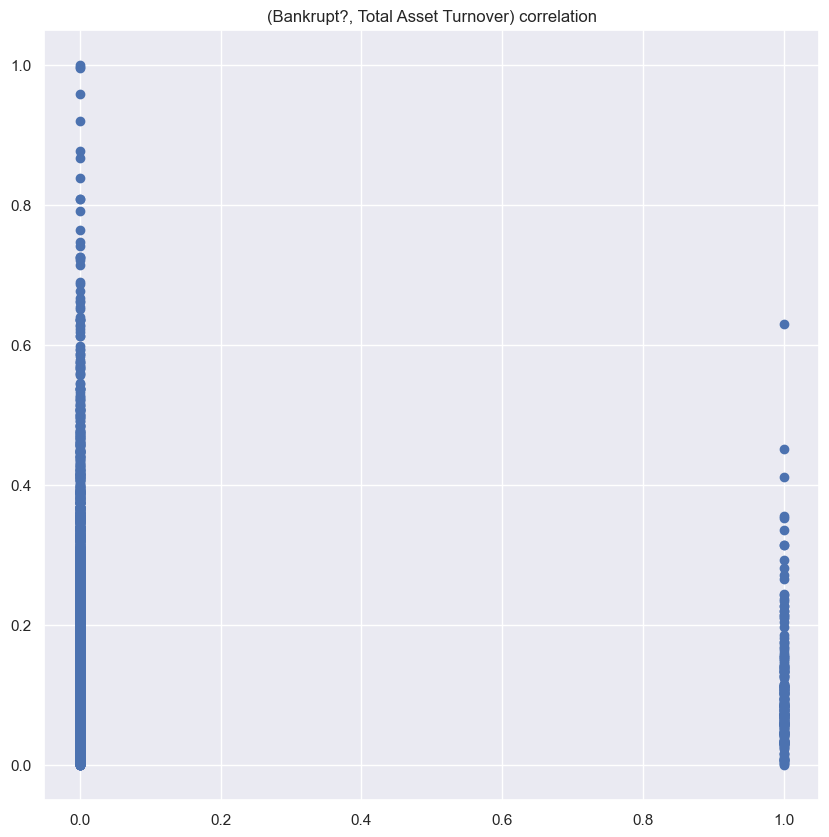

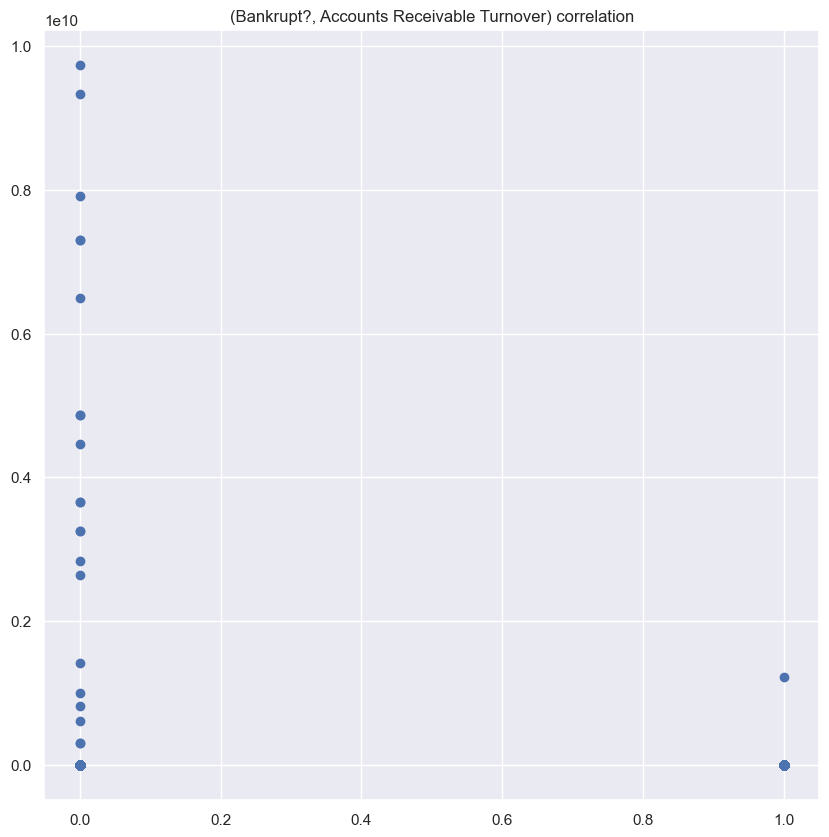

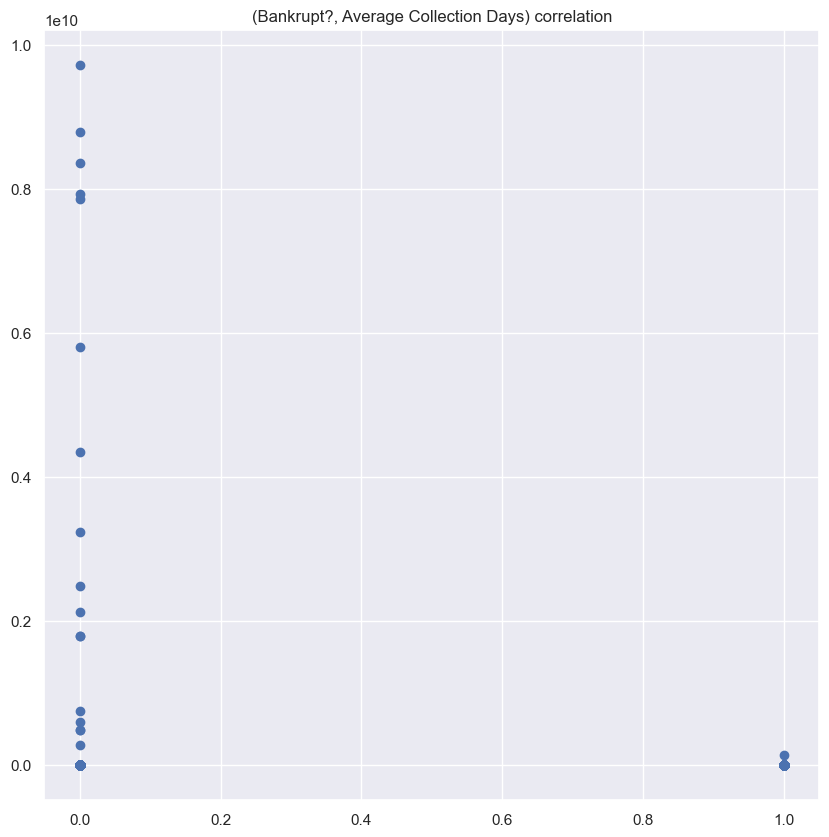

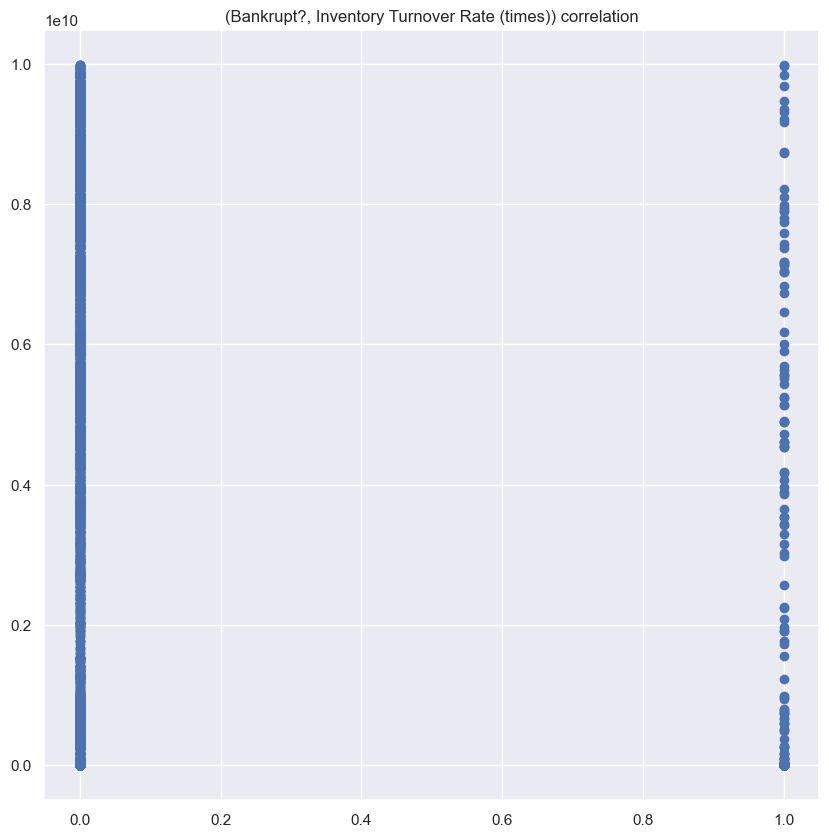

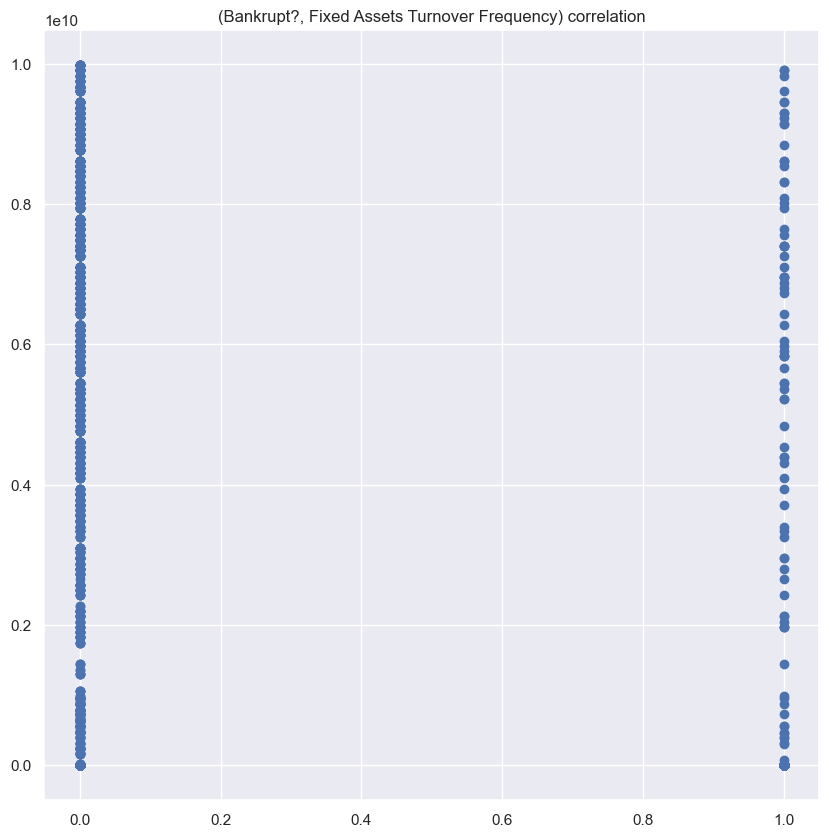

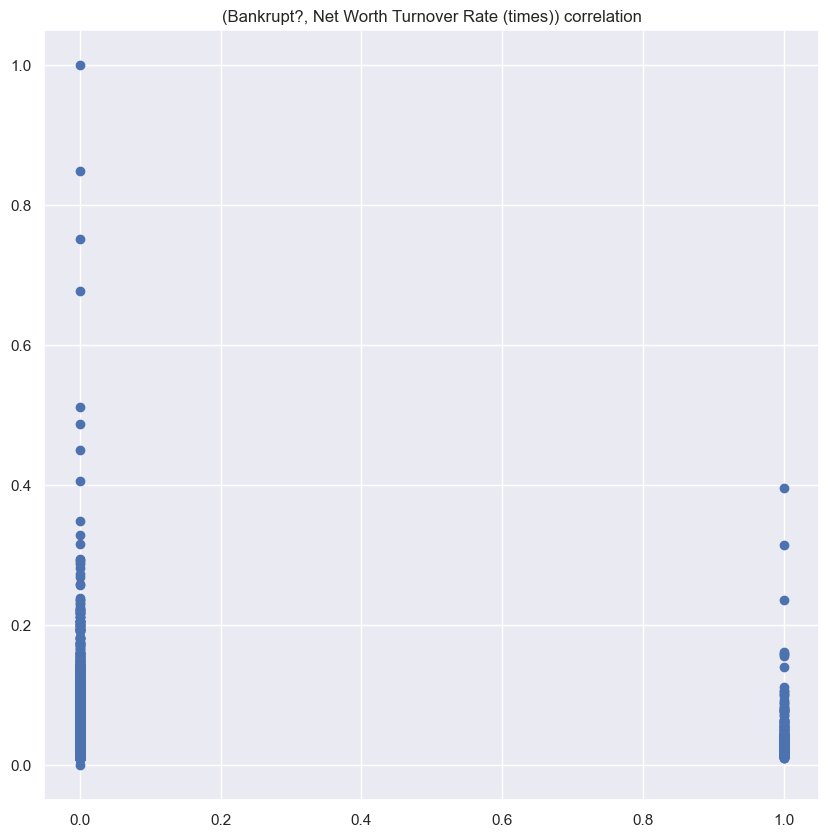

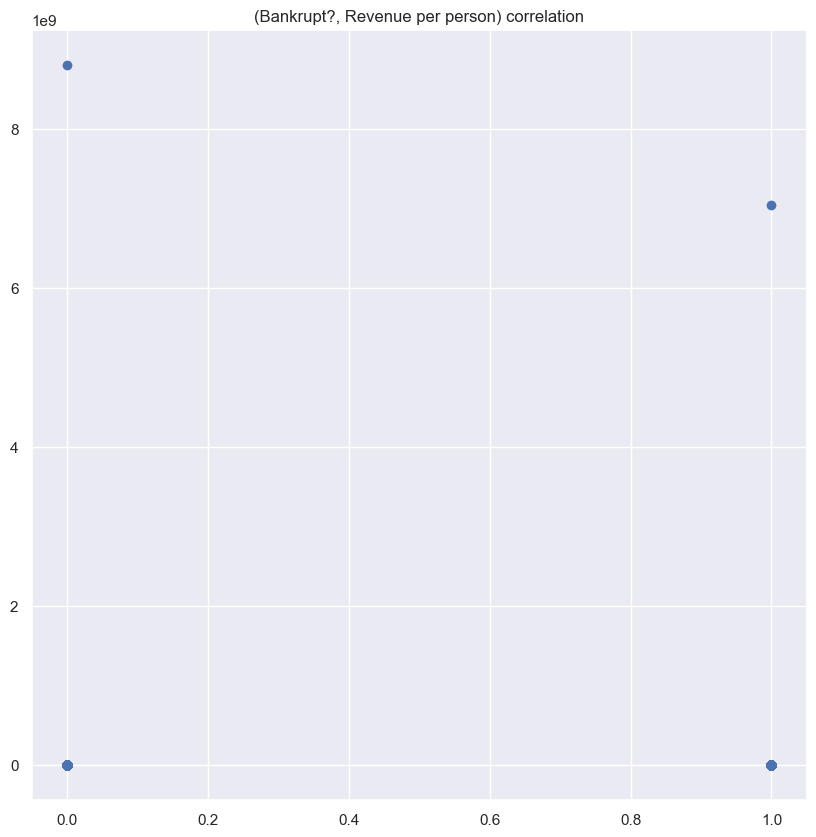

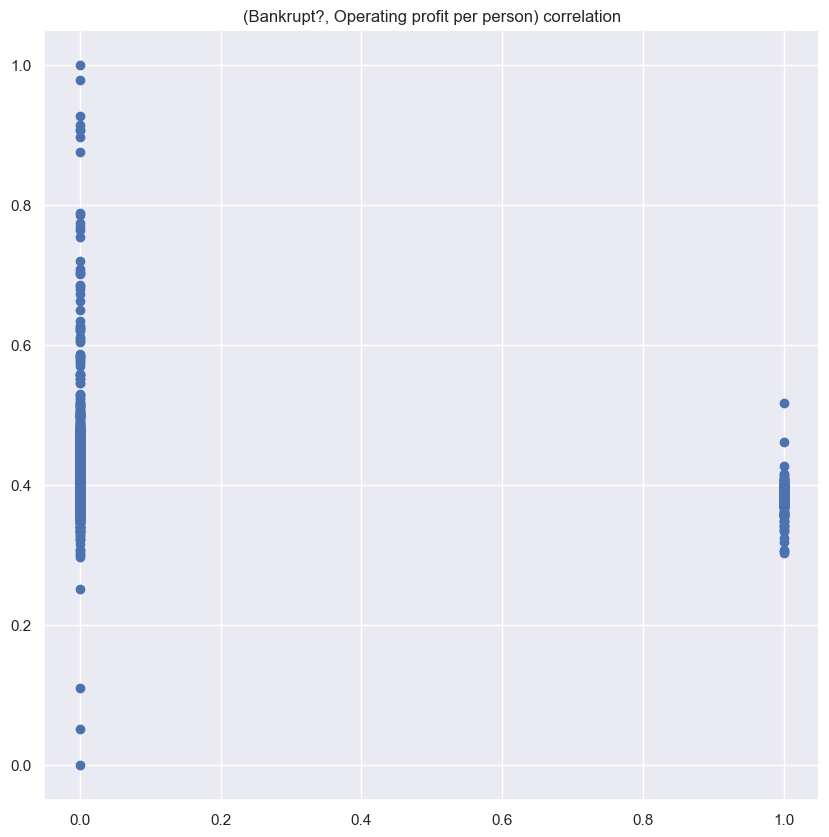

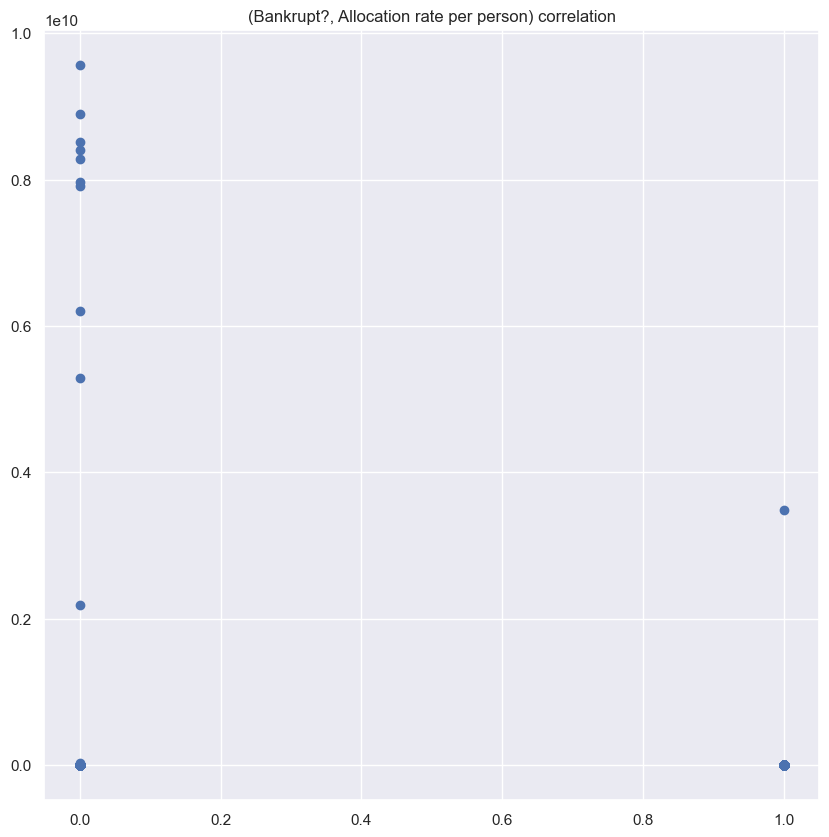

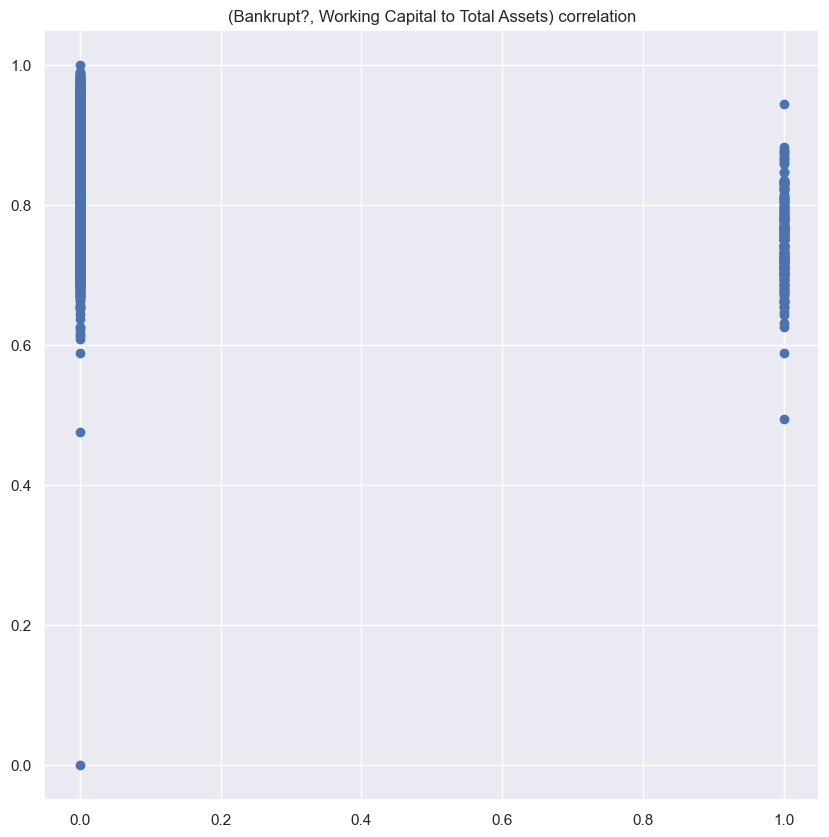

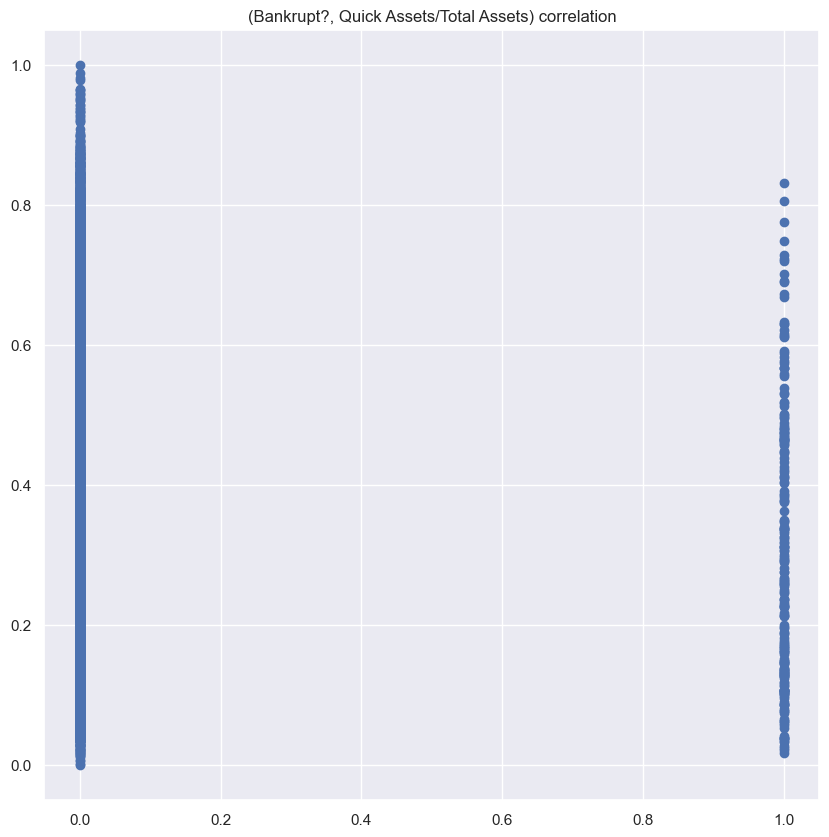

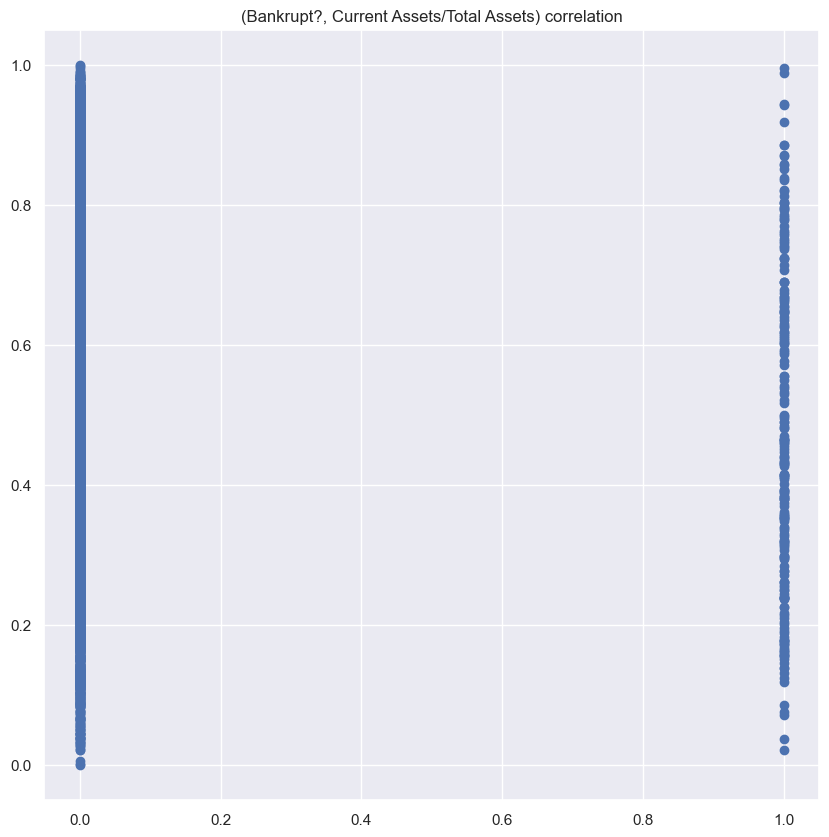

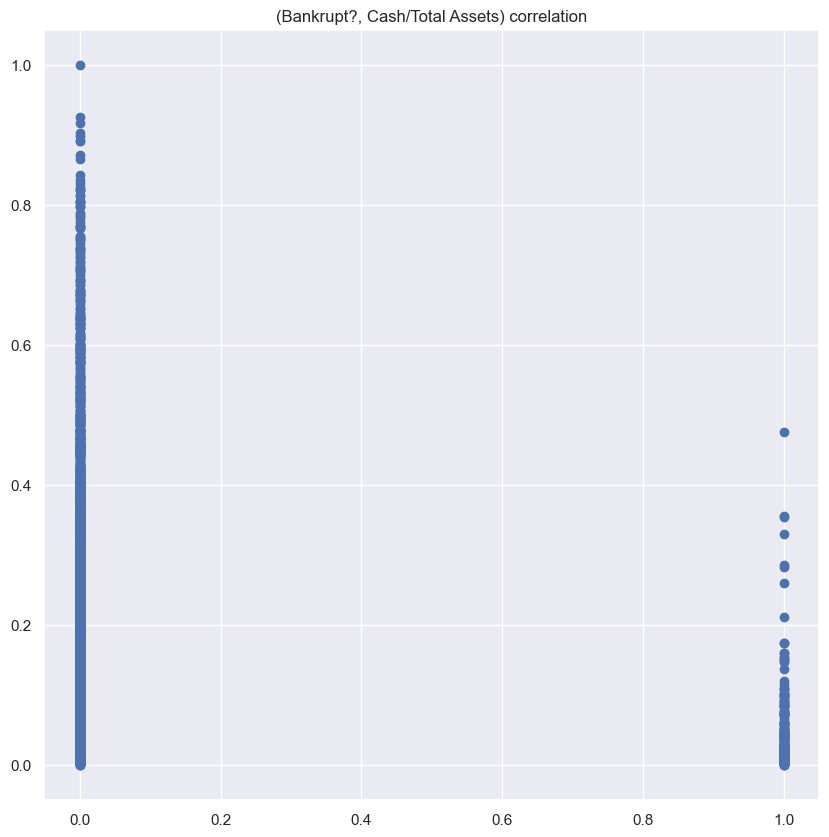

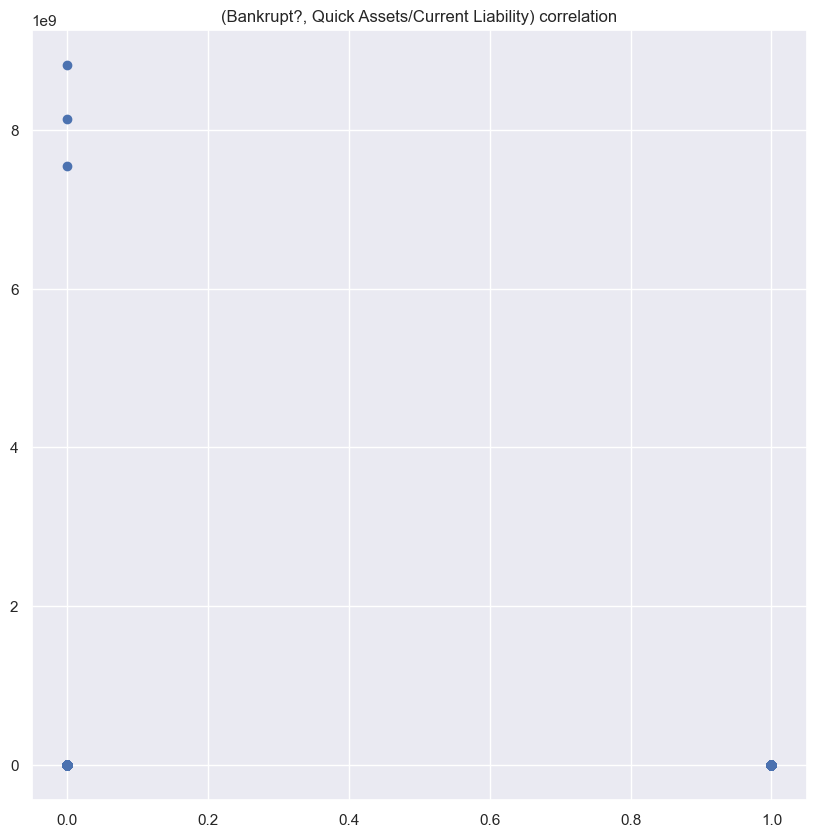

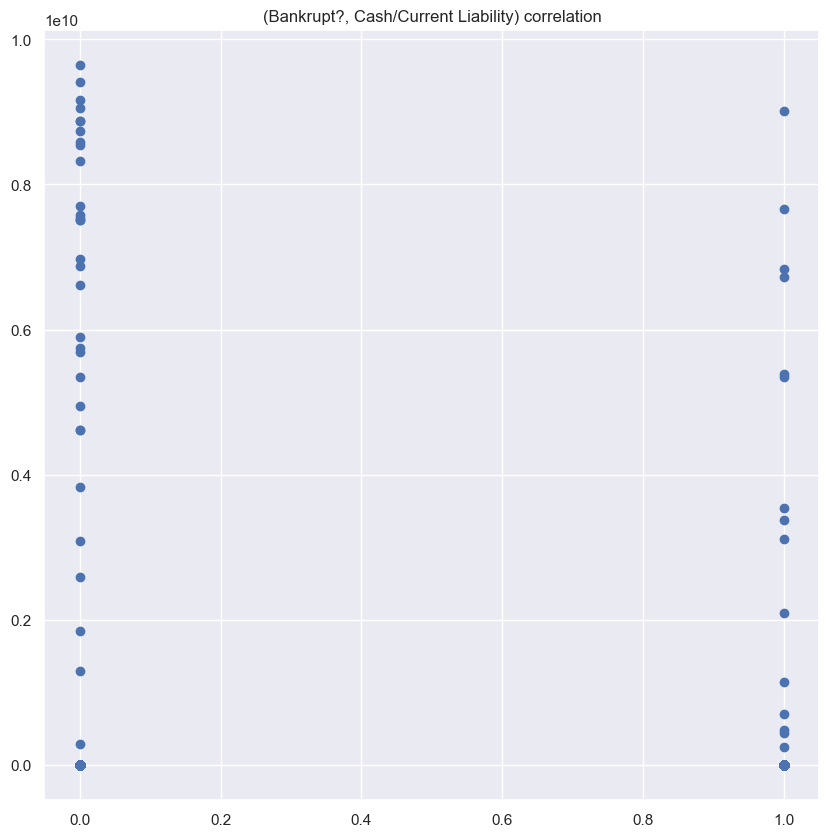

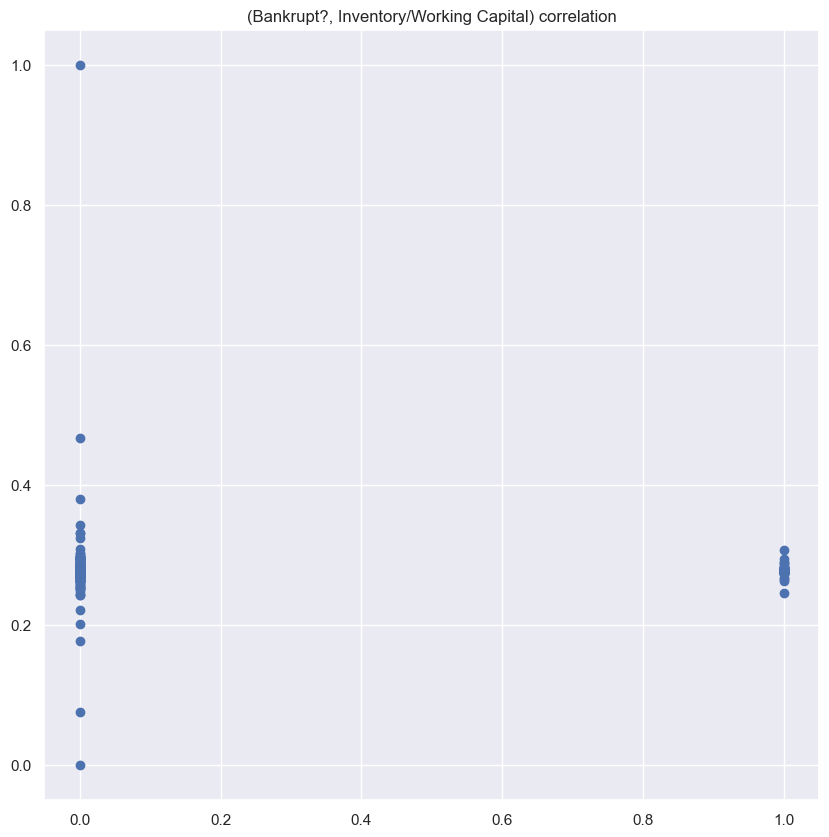

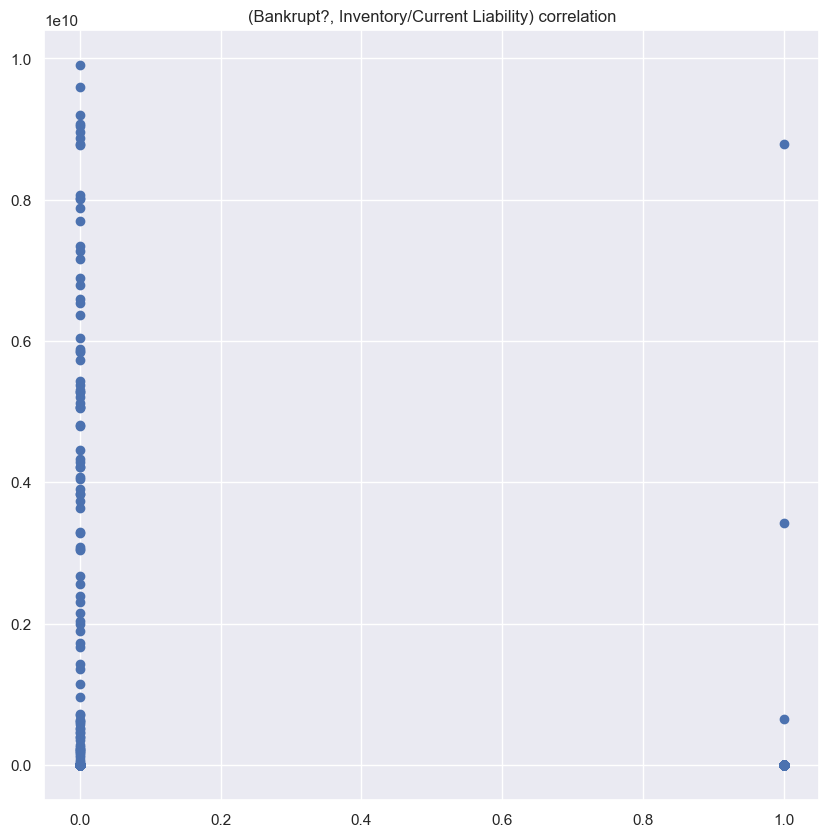

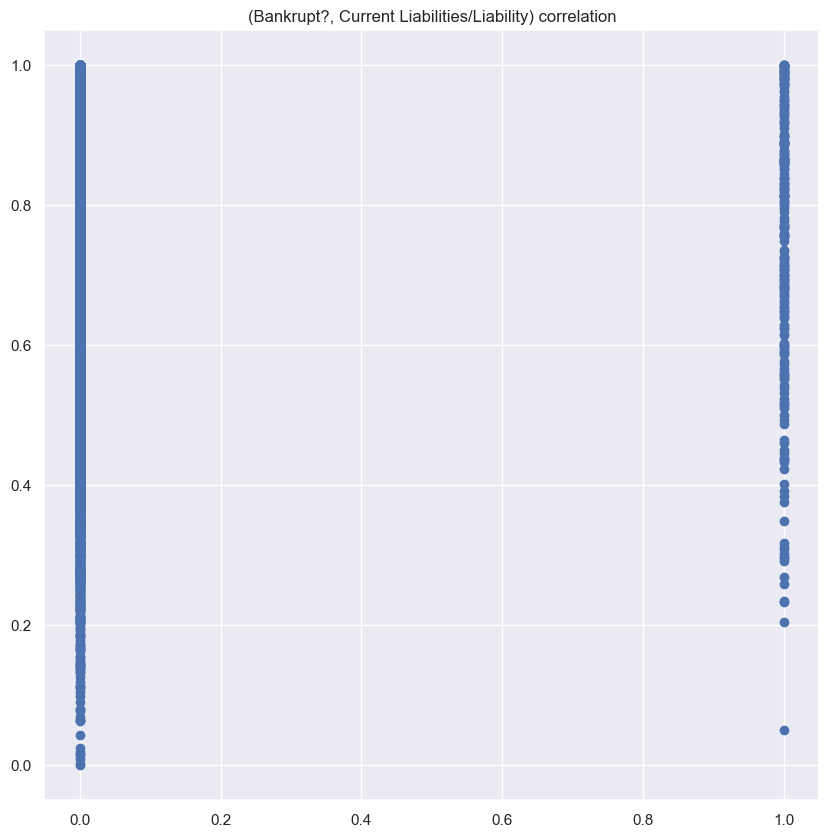

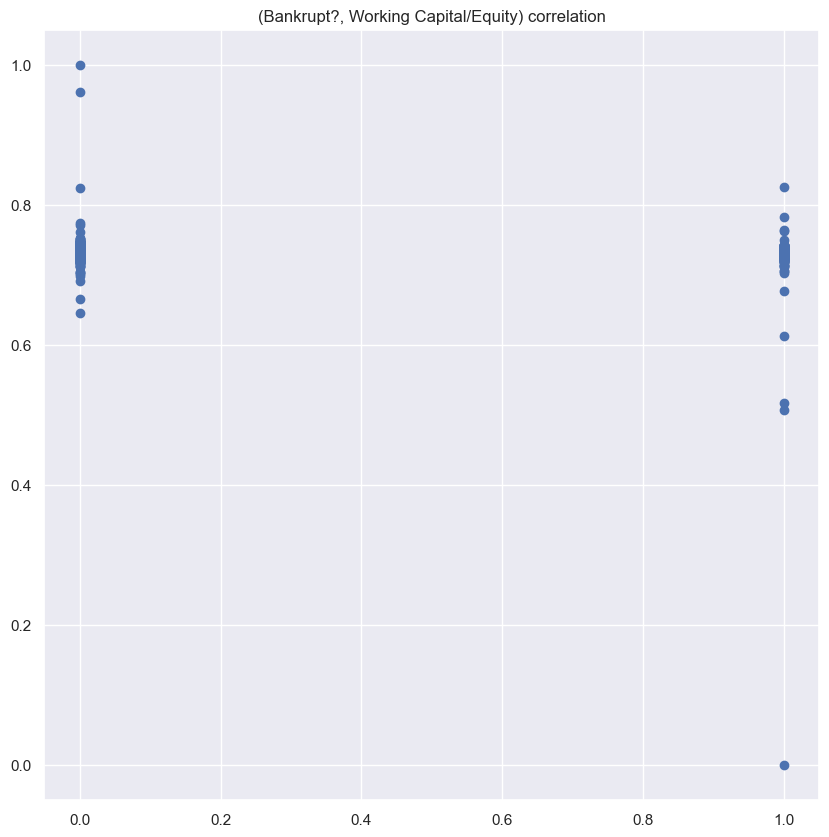

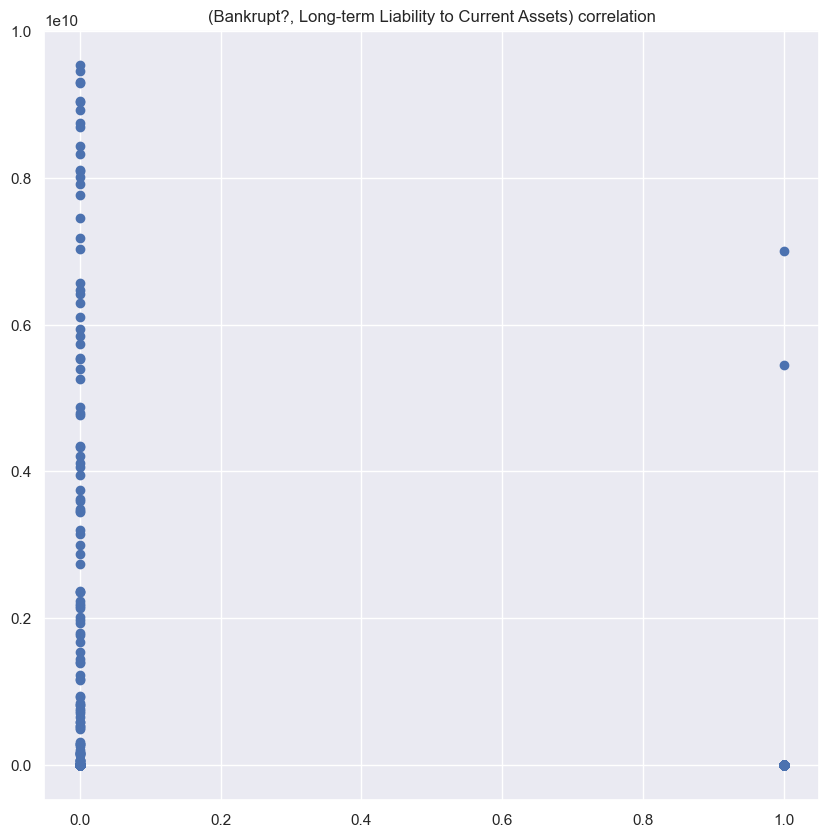

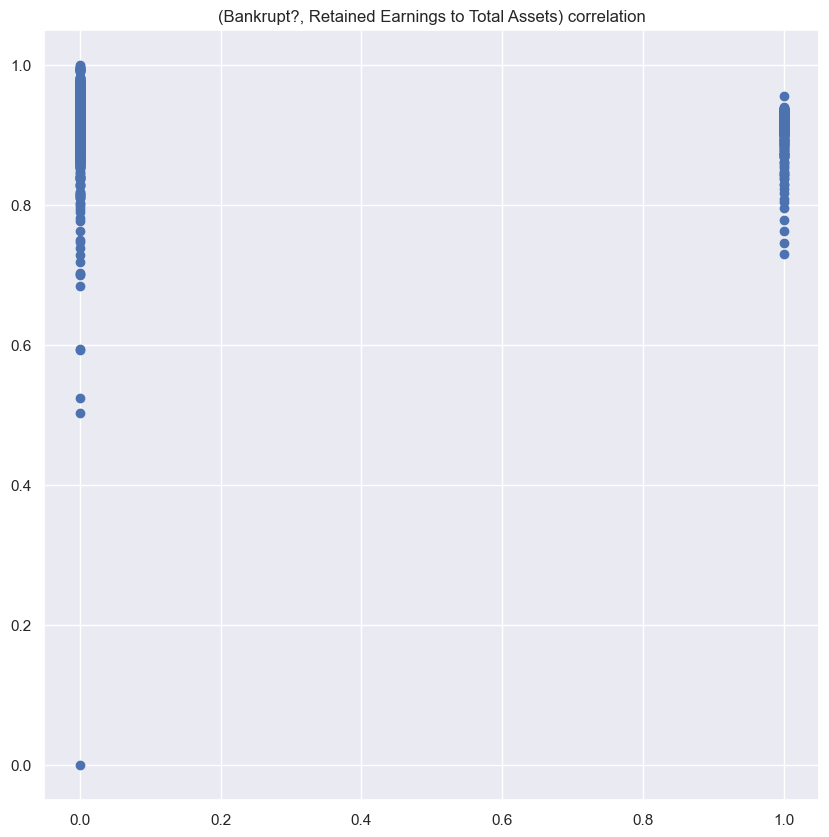

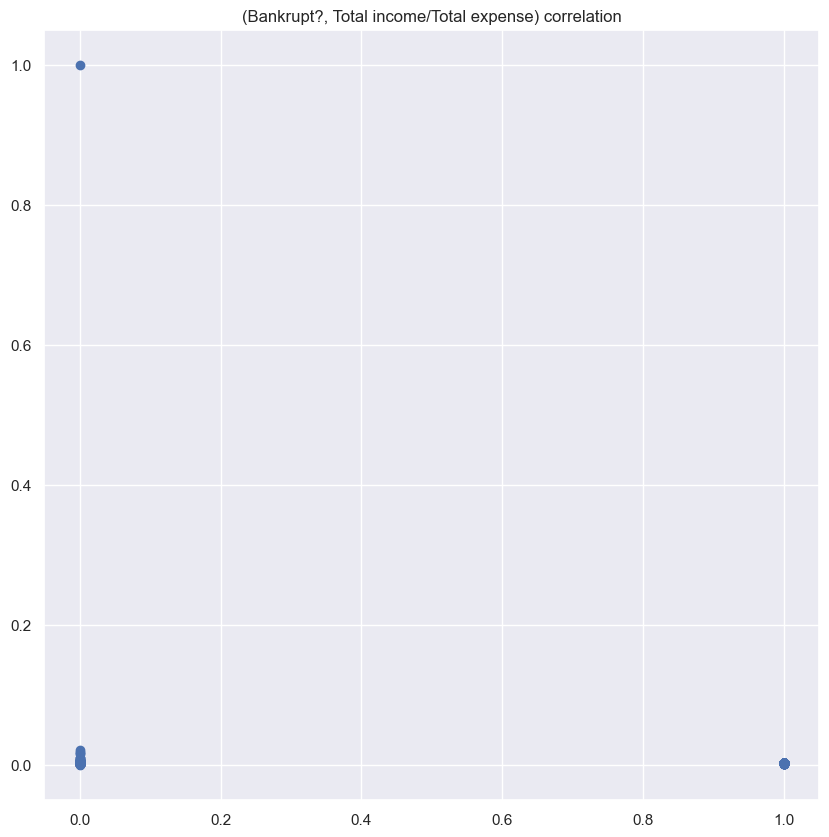

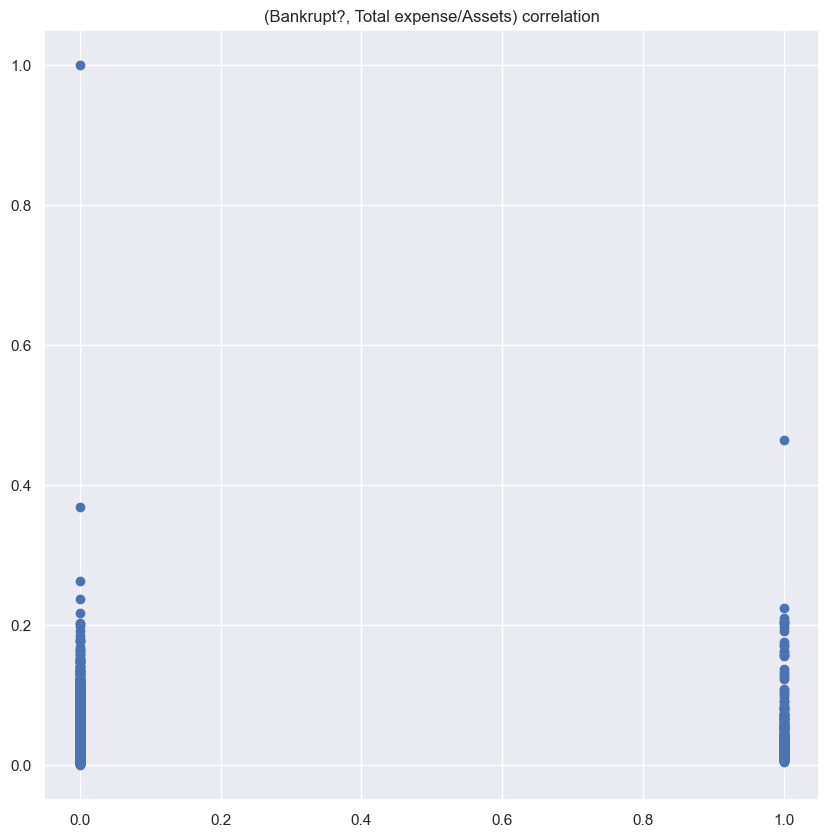

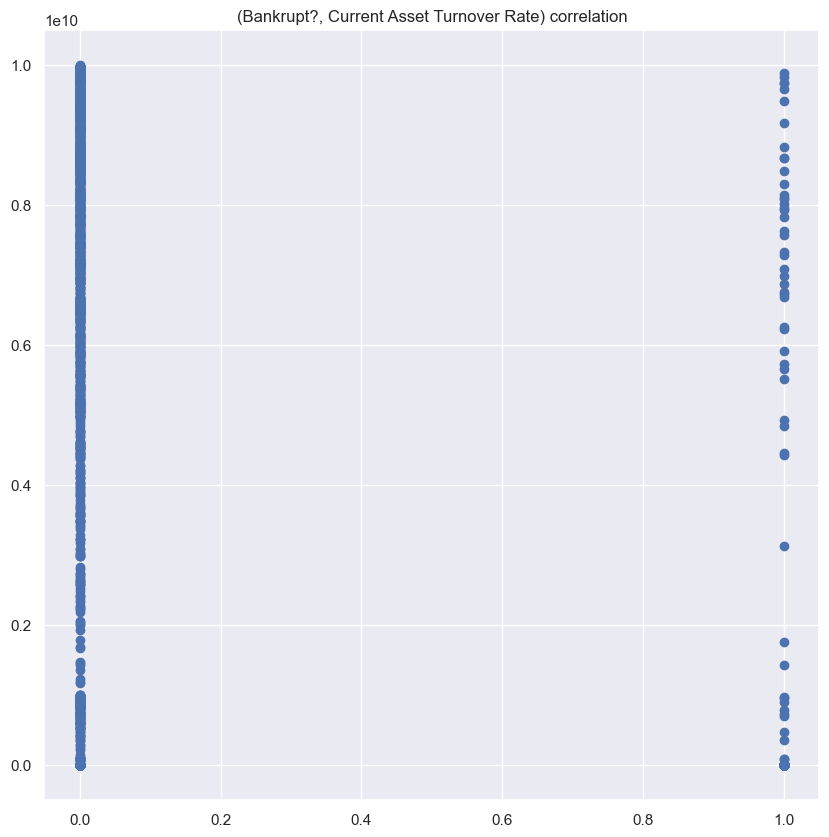

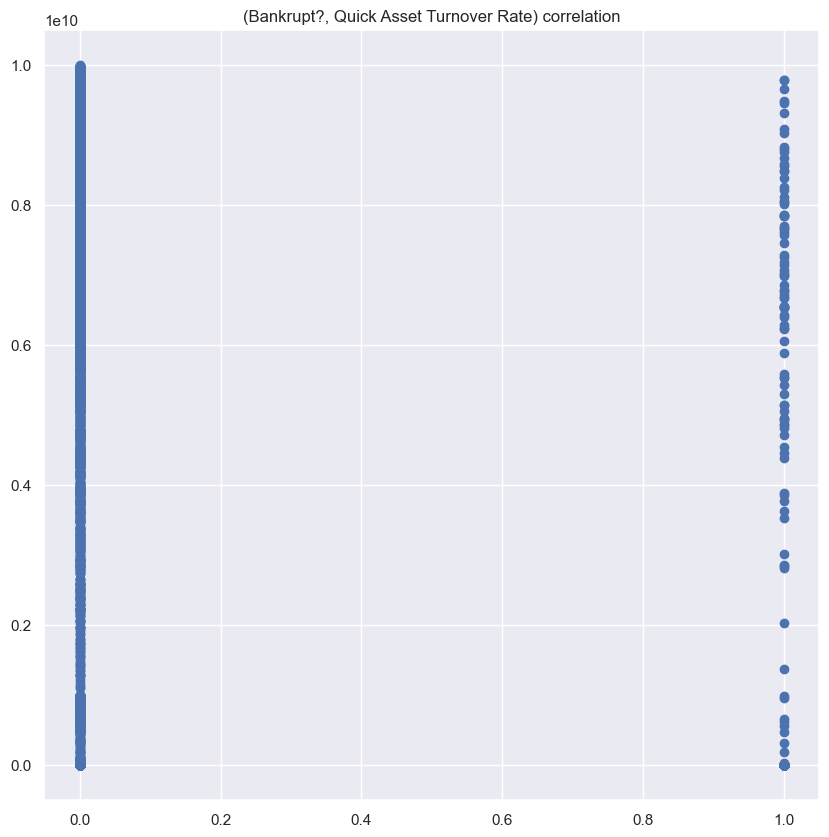

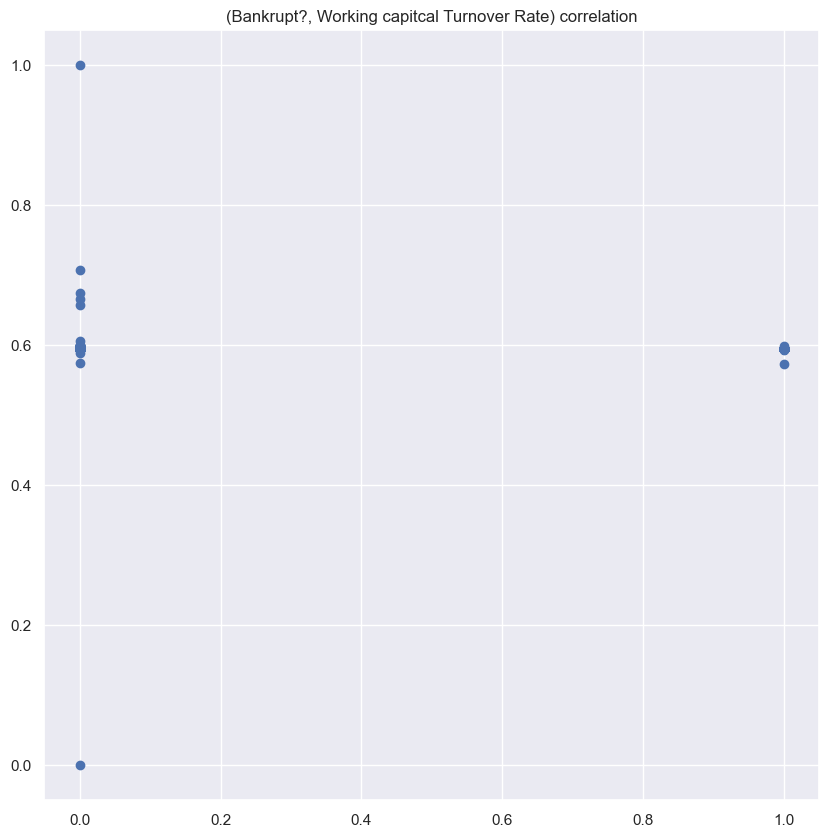

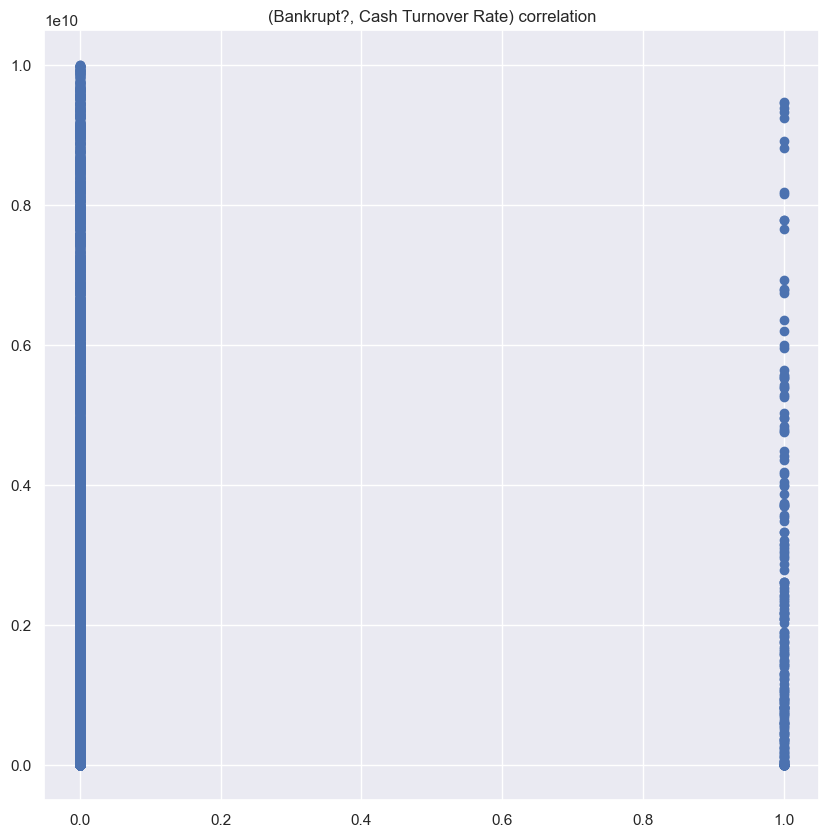

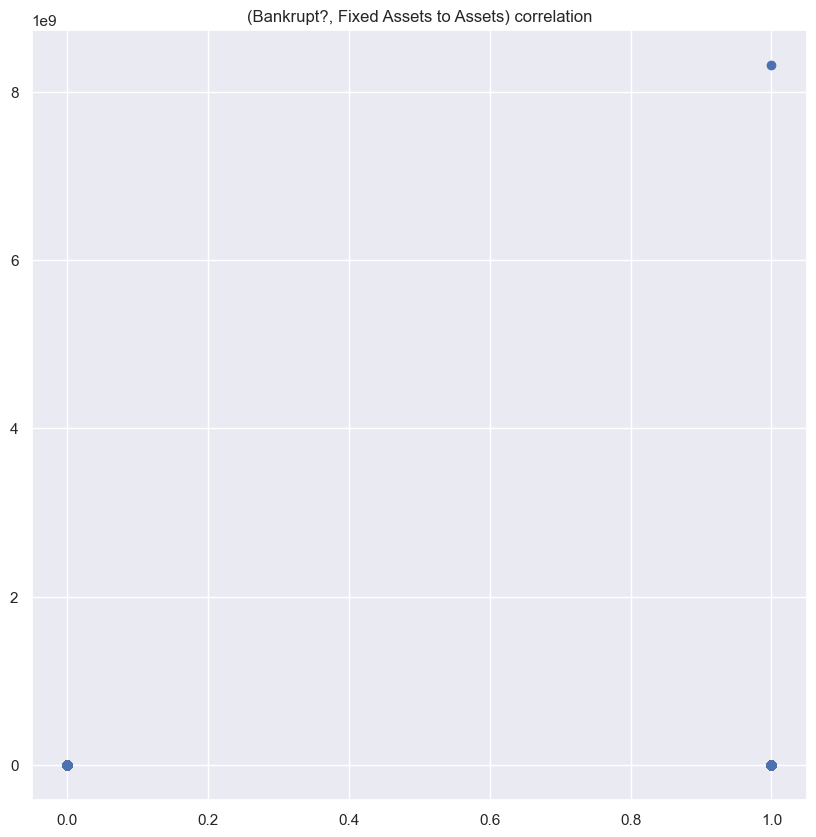

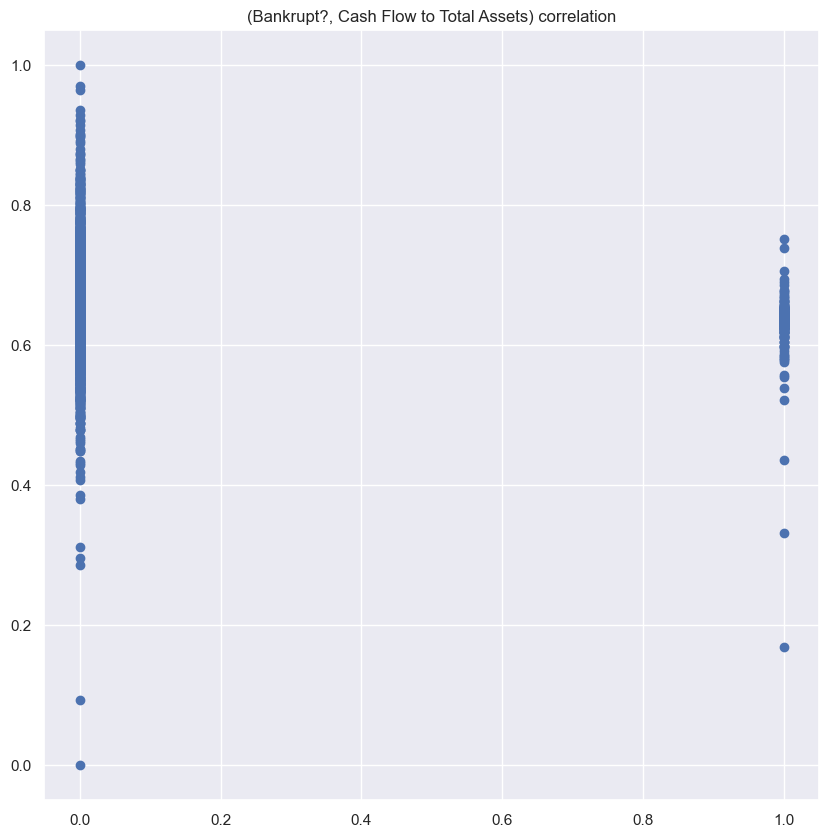

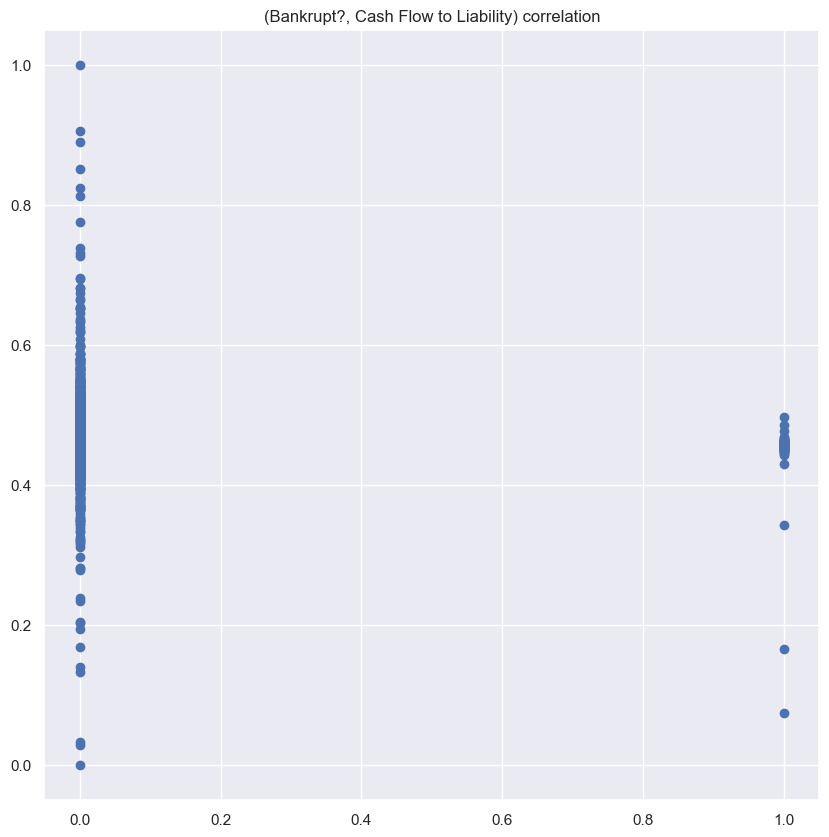

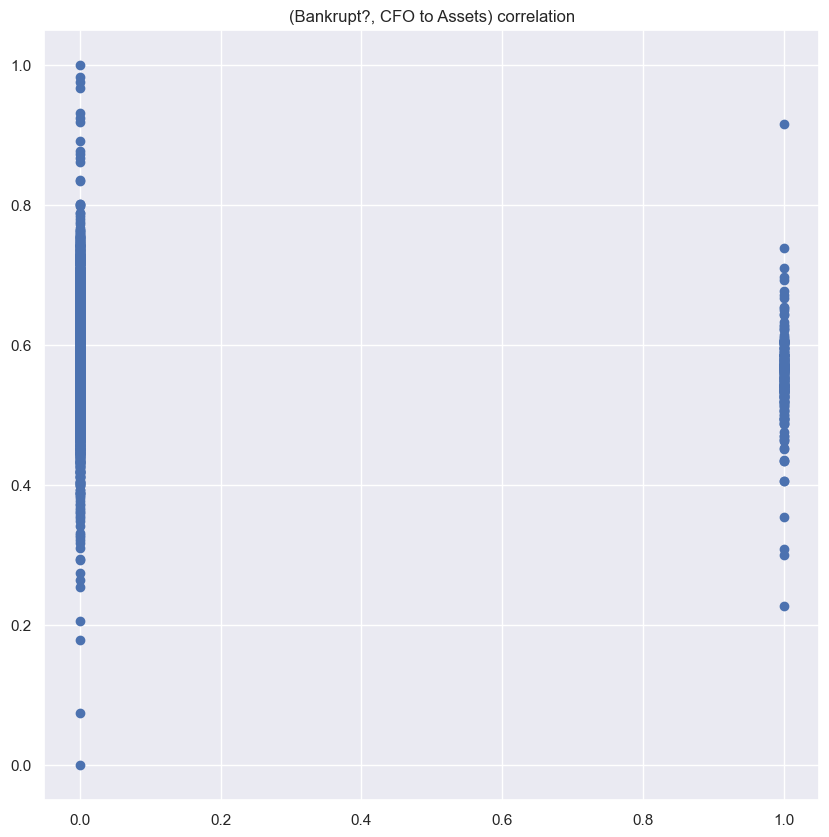

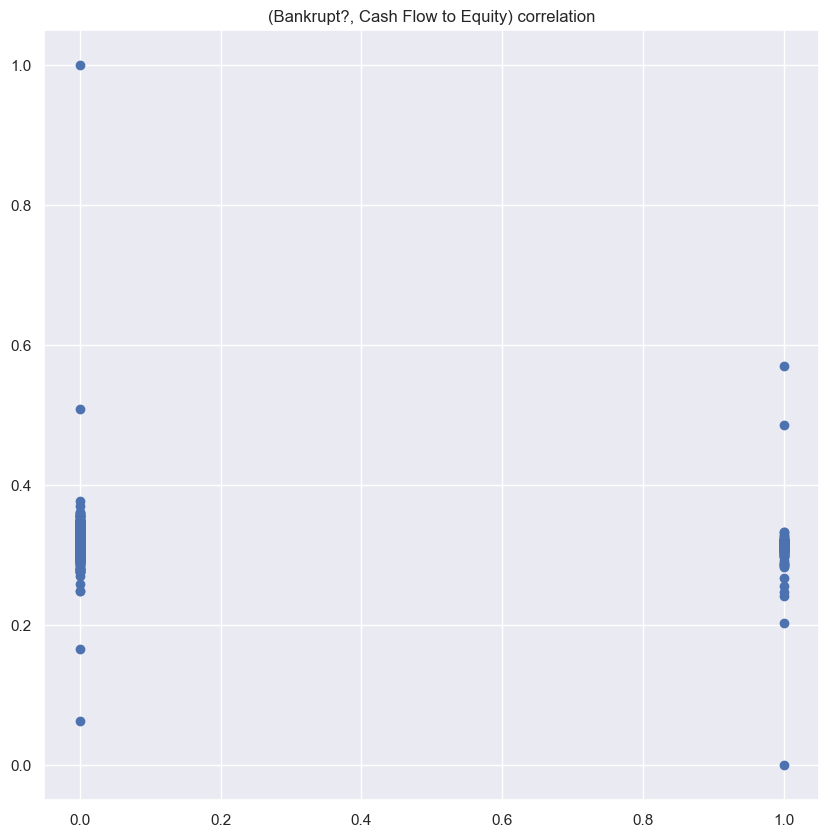

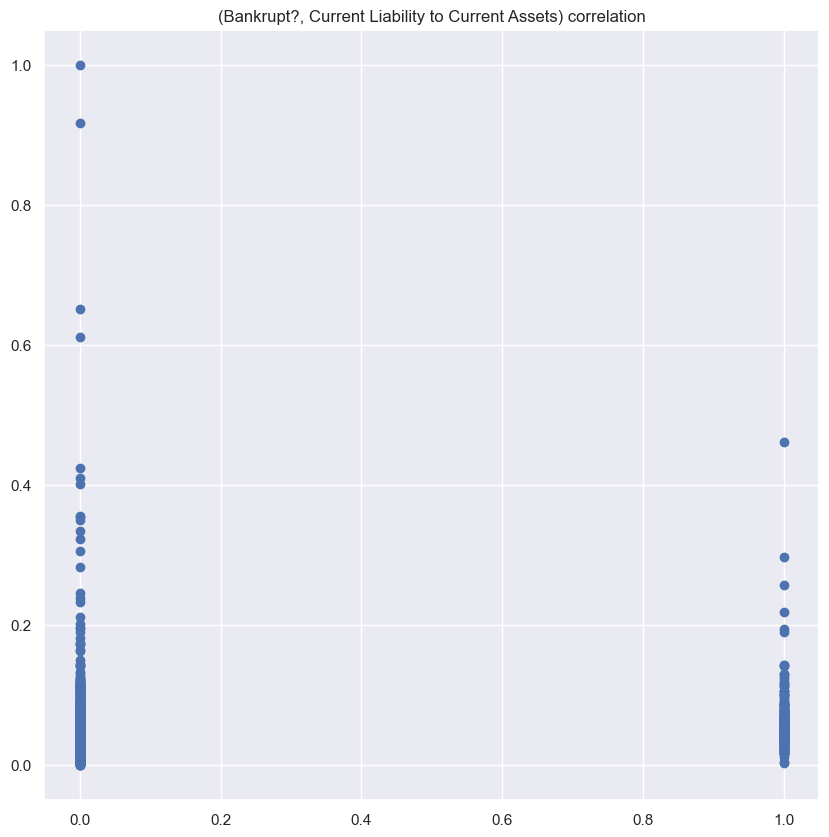

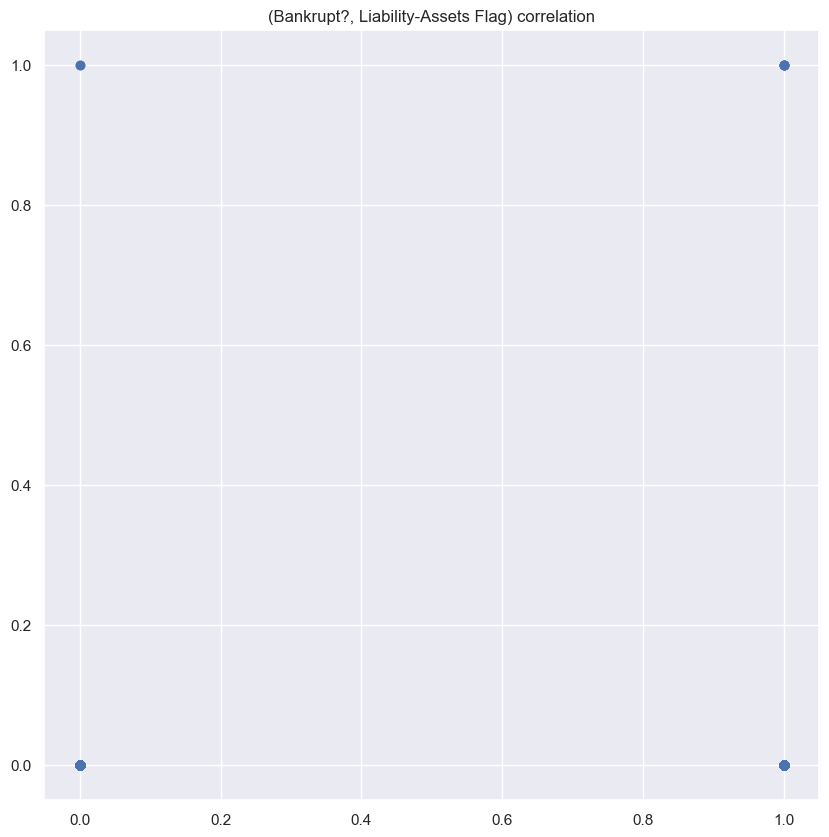

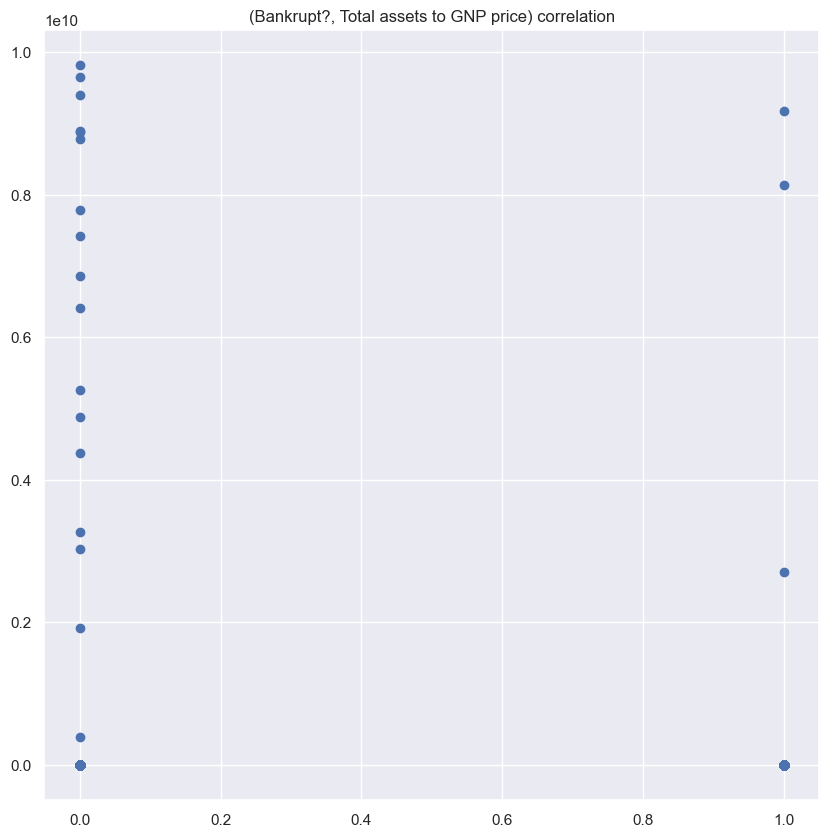

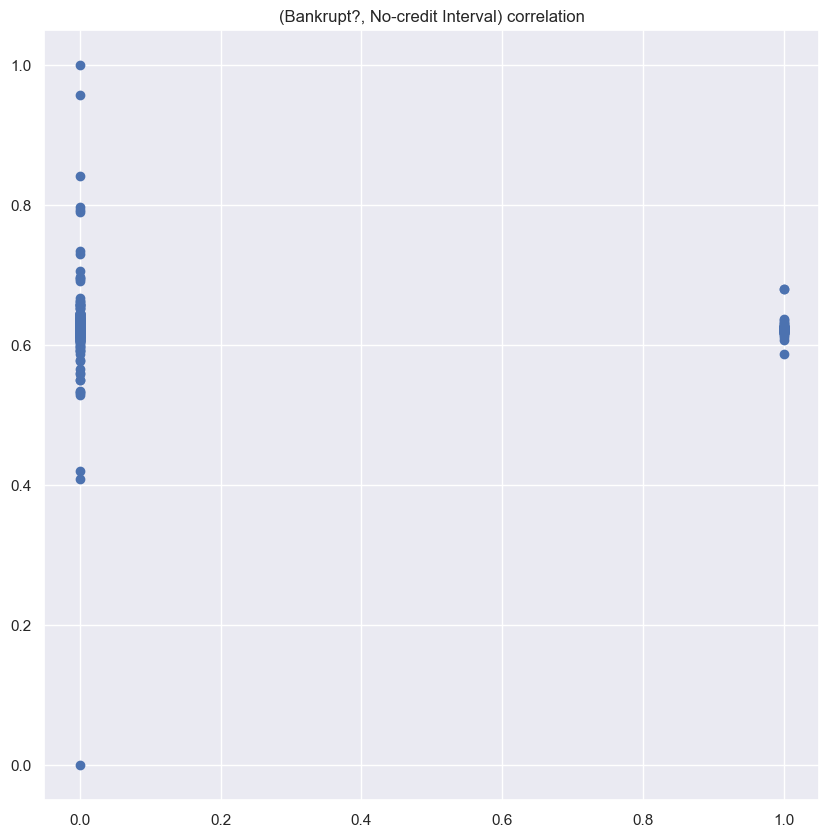

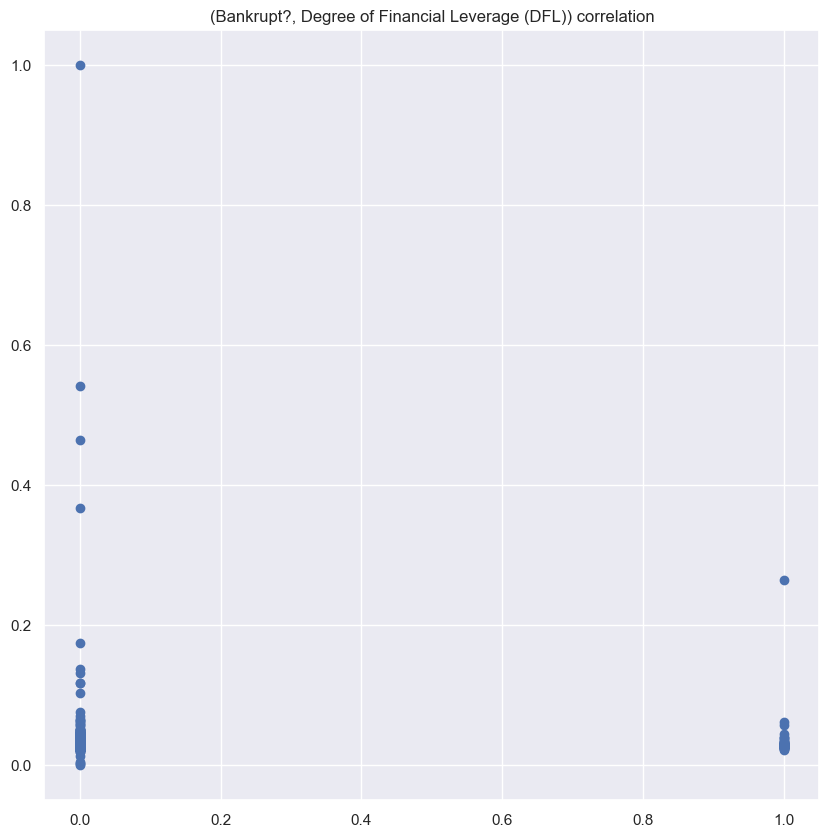

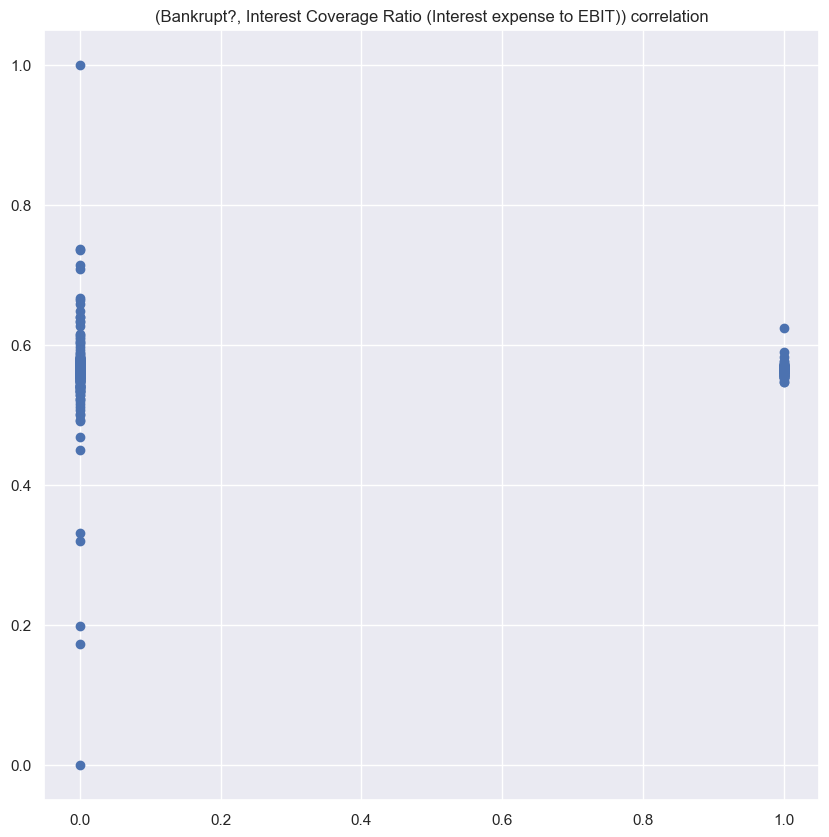

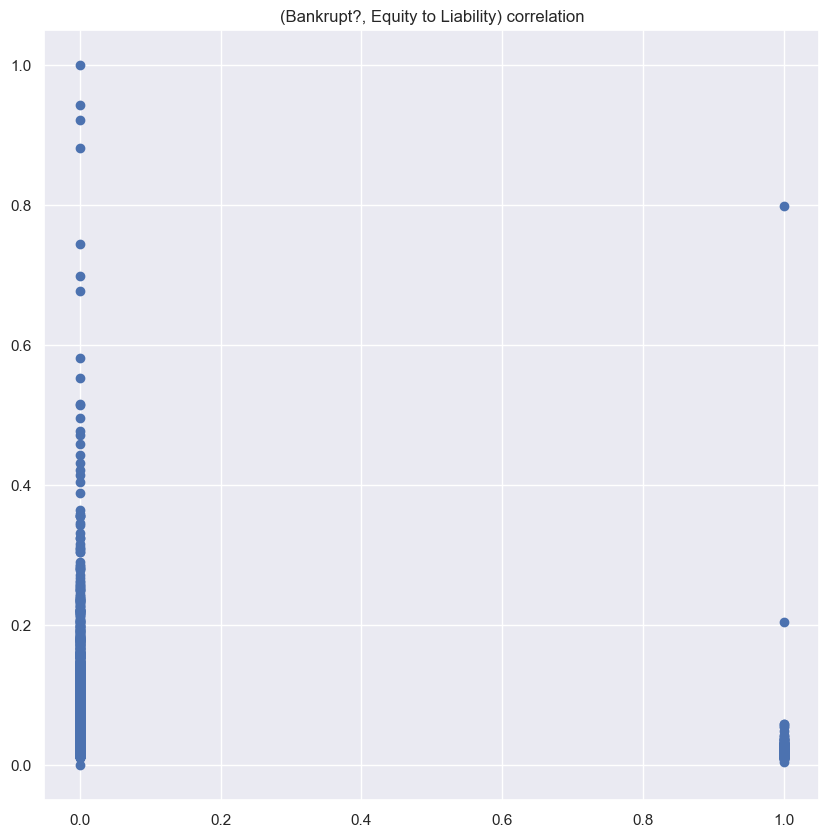

{"('Bankrupt?', 'Bankrupt?')": None, "('Bankrupt?', ' ROA(C) before interest and depreciation before interest')": None, "('Bankrupt?', ' Operating Gross Margin')": None, "('Bankrupt?', ' Operating Profit Rate')": None, "('Bankrupt?', ' Non-industry income and expenditure/revenue')": None, "('Bankrupt?', ' Operating Expense Rate')": None, "('Bankrupt?', ' Research and development expense rate')": None, "('Bankrupt?', ' Cash flow rate')": None, "('Bankrupt?', ' Interest-bearing debt interest rate')": None, "('Bankrupt?', ' Tax rate (A)')": None, "('Bankrupt?', ' Net Value Per Share (B)')": None, "('Bankrupt?', ' Persistent EPS in the Last Four Seasons')": None, "('Bankrupt?', ' Cash Flow Per Share')": None, "('Bankrupt?', ' Revenue Per Share (Yuan ¥)')": None, "('Bankrupt?', ' Realized Sales Gross Profit Growth Rate')": None, "('Bankrupt?', ' Operating Profit Growth Rate')": None, "('Bankrupt?', ' After-tax Net Profit Growth Rate')": None, "('Bankrupt?', ' Continuous Net Profit Growth Ra

In [8]:
%matplotlib inline

def scatter_(c1,c2,name=True):
  plt.figure(figsize=(10,10))
  plt.scatter(c1,c2)
  if name==True:
    plt.title(f"({c1.name},{c2.name}) correlation")
  plt.show()
  rho = np.corrcoef(c1,c2)


corr_dict = {}
column_pair = [ (n_df.columns[0],i) for i in n_df.columns]

for c in column_pair:
    corr_dict[str(c)] = scatter_(df[c[0]],df[c[1]])
    
print(corr_dict)


As we can see in most case the indicator are uniformly distributed between the two possible results, but in other cases we have vary specific range of value in which a ratio falls when showing bankrupt.

## Classification algorithm
### Set up the pipeline
Having identified the feature we will bring to the final model we can now proceed in setting up the pieline preparing the input data of the model. We will compare the results between a minmax scaler and a z-score scaler, also we compare results between different number of feature in the PCA. <br>
This is the right moment to identify the model to implement, we can follow several approach:

1. Support Vector Machine: work best with linear problem, it identify an hyperplane dividing the two category of firm. If the accuracy is high enough we can use alternativly the multivariate logistic regression.
2. Multivariate logistic regression: similarly to the SVM method place the firm bankrupt value on a logistic regression and round its value to find if it will dafault or not.
3. Decision tree: in order to define a process based on which we identify if a firm can go bankrupt. We will use this model when the problem result to be non-linear.
<br>


In [9]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from tempfile import mkdtemp

def steps(f,scl,model,d=5):
  s1 = ("Feature_reduction",PCA(f))
  if scl =="norm": s2 = ("Scale",StandardScaler())
  elif scl=="minmax": s2 = ("Scale",MinMaxScaler())
  else:
    print("Insert valid scaler")
    return 0
  if model =="svm": s3 = ("model",SVC())
  elif model =="logist": s3 = ("model",LogisticRegression())
  elif model =="lin": s3 = ("model",LinearRegression())
  elif model =="tree": s3 = ("model",DecisionTreeClassifier(max_depth=d))
  else:
    print("Insert valid scaler")
    return 0
  return [s1,s2,s3]


In order to handle the oversampling problem we will use SMOTE - Synthetic Minority Over-sampling TEchnique. Is a method used when a label we are trying to predict is rare. It can be summarised by the following steps:
1. Calculate the difference between a sample and its nearest neighbor.
2. Multiply this difference by a random number between 0 and 1.
3. Add the resulting value to the sample to create a new synthetic example.
4. Repeat this process with the next nearest neighbo <br>
(To go deeper on SMOTE method here is a nice article from [Medium](https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c))

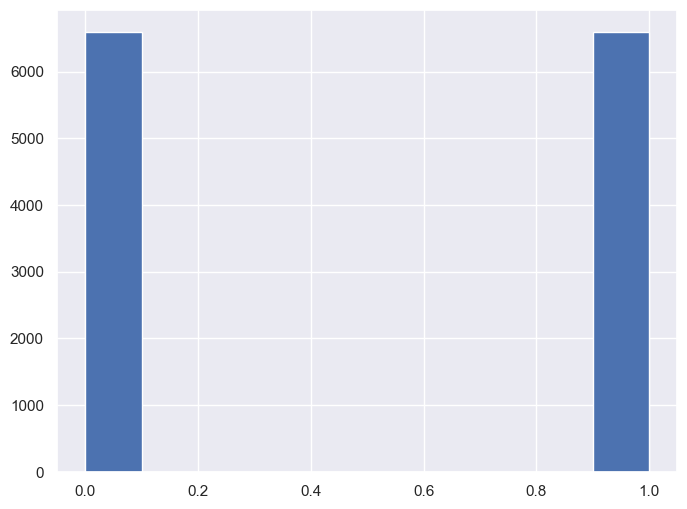

In [10]:
from imblearn.over_sampling import SMOTE
y,X = n_df[n_df.columns[0]].to_numpy(),n_df.drop(n_df.columns[0],axis=1).to_numpy()
X, y = SMOTE().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=0.5)

plt.figure(figsize=(8,6))
plt.hist(y)
plt.show()

In [11]:
cachedir = mkdtemp() #used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical
pipe = Pipeline(steps(40,"norm","svm"),memory=cachedir)
pipe

Pipeline(memory='/var/folders/sr/r5xnmb6d4_dc9mgnjc301qr40000gn/T/tmpi_hgdohx',
         steps=[('Feature_reduction', PCA(n_components=40)),
                ('Scale', StandardScaler()), ('model', SVC())])

Model accuracy:  0.9578724049098348


[Text(0, 0.5, 'Not Bankrupt'), Text(0, 1.5, 'Bankrupt')]

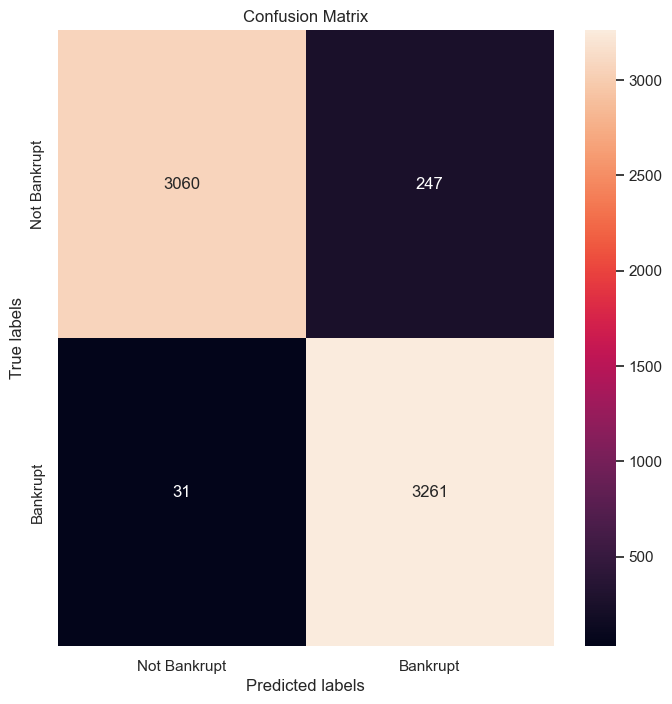

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

model = pipe.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Model accuracy: ", accuracy_score(y_test,y_pred))

plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt'])
ax.yaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt'])

In [13]:
cachedir = mkdtemp() #used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical
log_reg = Pipeline(steps(40,"norm","logist"),memory=cachedir)
log_reg

Pipeline(memory='/var/folders/sr/r5xnmb6d4_dc9mgnjc301qr40000gn/T/tmpzlwx4oyr',
         steps=[('Feature_reduction', PCA(n_components=40)),
                ('Scale', StandardScaler()), ('model', LogisticRegression())])

In [14]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error,mean_absolute_percentage_error


model = log_reg.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Model mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("Model accuracy: ", accuracy_score(y_test,y_pred))


Model mean absolute error:  0.10289437793605091
Model accuracy:  0.8971056220639491


The accuracy is great for both method (best for SVM), this allows to think that the problem is linear and we do not need another model. But since in most case is useful to understand how a ML model make a decision, consider the decision tree classifier as a possible link between human logic and ML algorithm.

In [15]:
cachedir = mkdtemp() #used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical
clf = Pipeline(steps(40,"norm","tree",3),memory=cachedir)
clf  

Pipeline(memory='/var/folders/sr/r5xnmb6d4_dc9mgnjc301qr40000gn/T/tmpk7e_0xkx',
         steps=[('Feature_reduction', PCA(n_components=40)),
                ('Scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=3))])

Model accuracy:  0.7642066979845431


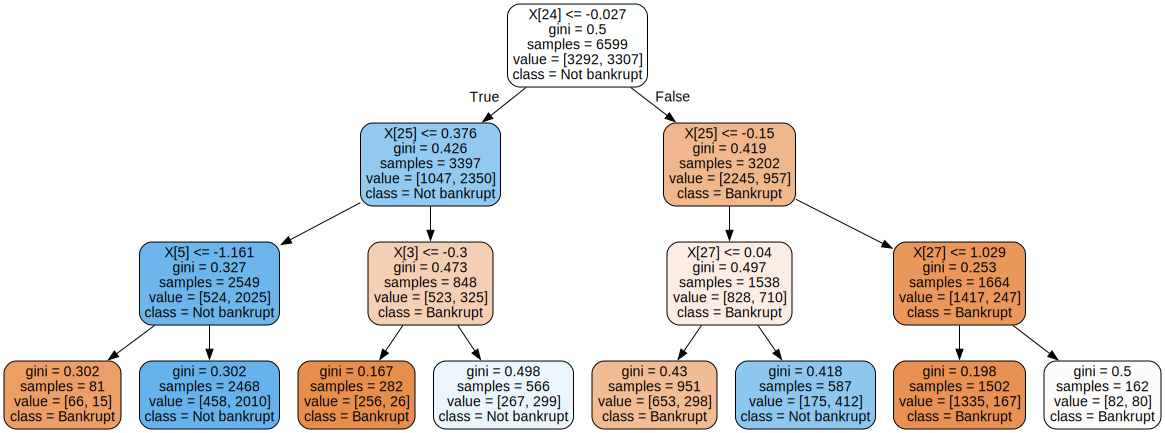

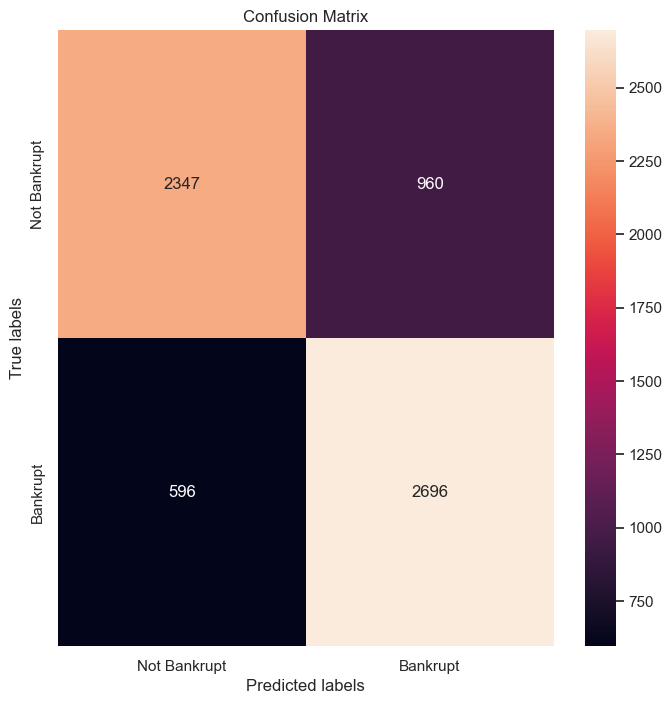

In [16]:
from sklearn import tree
import graphviz 


model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)
#print("Model mean absolute error: ", mean_absolute_error(y_test,y_pred))
print("Model accuracy: ", accuracy_score(y_test,y_pred))


plt.figure(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt'])
ax.yaxis.set_ticklabels(['Not Bankrupt', 'Bankrupt'])

dot_data = tree.export_graphviz(model[-1],class_names=["Bankrupt",'Not bankrupt'],filled=True,rounded=True,) 

graph = graphviz.Source(dot_data) 
graph 

## Hyperparameter tuning
The best model results to be the SVM, now we try to optimise further the accuracy by modifying the original pipeline and train size.

In [17]:
cachedir = mkdtemp() #used to avoid computing the fit transformers within a pipeline if the parameters and input data are identical
pipe = Pipeline(steps(40,"norm","svm"),memory=cachedir)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=0.5)

data_size = [0.15,0.20,0.33,0.4,0.5,0.55]
pca_size = [5,10,20,30,35,40,45,50,60,65]
scal = ["minmax","norm"]

acc_mx_norm = np.ndarray(shape=(len(data_size),len(pca_size)))
acc_mx_mnmx= np.ndarray(shape=(len(data_size),len(pca_size)))

for d in range(len(data_size)):
  for p in range(len(pca_size)):
    for s in scal:
      pipe = Pipeline(steps(pca_size[p],s,"svm"),memory=cachedir)
      X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,train_size=data_size[d])
      model = pipe.fit(X_train,y_train)
      acc = accuracy_score(y_test,model.predict(X_test))
      #nrm = {"train_size":d ,"feature": p,"scaler":s,"accuracy": acc}
      #print(f"Accuracy for {d} training size, {p} total feature reduced and {s} scaler: {acc}")
      if s == "norm":
        acc_mx_norm[d,p] = acc
      else:
        acc_mx_mnmx[d,p] = acc

norm_acc = pd.DataFrame(data = acc_mx_norm, columns = pca_size,index =data_size)
minmax_acc = pd.DataFrame(data = acc_mx_mnmx, columns = pca_size,index =data_size)

We have created a dataframe representing the accuracy for different sample size of the training set and number of feature used by the model. We can now identify the best combination for our model.

In [18]:
print("Standard scaler")
display(norm_acc.style.applymap(lambda x: 'background-color : yellow' if x>0.95 else ''))
print("MinMax scaler")
display(minmax_acc.style.applymap(lambda x: 'background-color : yellow' if x>0.92 else ''))


Standard scaler


,5,10,20,30,35,40,45,50,60,65
0.150000,0.676442,0.780194,0.765933,0.915946,0.932882,0.935556,0.935288,0.936804,0.936269,0.936001
0.200000,0.681030,0.793446,0.765982,0.918837,0.934463,0.939767,0.938725,0.939388,0.938915,0.939388
0.330000,0.679294,0.824720,0.784688,0.930793,0.943006,0.946172,0.946511,0.949565,0.948208,0.947755
0.400000,0.691249,0.831671,0.790251,0.939260,0.951130,0.953908,0.956181,0.957949,0.955297,0.954666
0.500000,0.703743,0.841037,0.799060,0.944082,0.955145,0.957872,0.959691,0.963176,0.959691,0.959236
0.550000,0.701684,0.842761,0.803199,0.939899,0.956734,0.959764,0.959428,0.964815,0.962626,0.961616


MinMax scaler


,5,10,20,30,35,40,45,50,60,65
0.150000,0.676174,0.771994,0.749710,0.903022,0.910331,0.911311,0.912203,0.910955,0.914431,0.913985
0.200000,0.678852,0.768160,0.751681,0.901790,0.913628,0.914859,0.913818,0.915238,0.916659,0.917701
0.330000,0.671378,0.790343,0.765577,0.913039,0.920841,0.919937,0.918127,0.917449,0.918693,0.920163
0.400000,0.683293,0.787852,0.772446,0.919939,0.926380,0.926632,0.926380,0.926758,0.928147,0.928021
0.500000,0.686468,0.795120,0.775269,0.919685,0.928929,0.927413,0.930596,0.929989,0.930444,0.928626
0.550000,0.701684,0.797811,0.775758,0.913131,0.925758,0.926094,0.927104,0.928283,0.928283,0.927778


We can highlight how the standard scaler result in better accuracy, while for the number of feature after 30 we reach a platou where the increase of feature increase the accuracy slightly. <br>
Since a large training set could lead to overfitting the model we coould chose as hyperparameter a standard scaler with 40% trainig set and 45 feature in total.
## Conclusion 
After proper trasnformation of the dataset, we have built three possible ML model to predict the default of a firm. First we have explored the dataset analysing the kind of datatype and the correlation among the features. To address the class imbalance we introduced the SMOTE method. We have done some preliminary feature selection through the mean of correlation and then a proper PCA built inside the pipeline itself. Finally, we have built three different ML model focusing at the end on the SVM method which shows bets accuracy performance.
## Further work
The dataset imbalance is a great limit for the model, so talking abount future steps we surely need to enlarge the dataset in that direction. We could also think about a more deep feature selection considering the tradeoff between overfitting and accuracy.